# Data Science I
### Klausur II im Sommersemester 2024

## Allgemeine Informationen

* Sie haben eine Woche Zeit, um die Klausur zu bearbeiten.

* Sie können alle Quellen verwenden, müssen sie jedoch korrekt benennen. Wenn Sie ChatGPT oder eine ähnliche Software verwenden, müssen Sie dies kenntlich machen und den verwendeten Prompt angeben.

* Sie dürfen in keiner Form Hilfe von Dritten in Anspruch nehmen.

* Sie dürfen Ihren Code nicht mit Dritten teilen (bspw. über ein öffentliches GitHub-Repository)

* Sie sollten die folgenden Pakete verwenden: `numpy, pandas, geopandas, scipy, statsmodels, scikit-learn/sklearn, matplotlib, seaborn` und Pythons Standardlibraries. Diese sind ausreichend, um die Klausur zu lösen. Falls Sie andere Pakete verwenden, rechtfertigen Sie deren Verwendung.

* Falls nicht anders angegeben, nutzen Sie ausschließlich Python Code innerhalb dieses Notebooks zur Lösung der Aufgaben.

* Der Code muss ausreichend kommentiert und verständlich sein. Schreiben Sie Funktionen beim Wiederverwenden von Code. Befolgen Sie im Allgemeinen die Richtlinien aus der Vorlesung. Punkte können aufgrund eines schlecht strukturierten oder unverständlichen Codes abgezogen werden.

* **Begründen Sie immer Entscheidungen** zur Auswahl von Plots, Hypothesentest usw. und **interpretieren Sie** Ihre Ergebnisse.

* Bitte laden Sie Ihr Notebook mit Zellenausgabe sowie alle weiteren Dateien als `.zip`-Verzeichnis mit dem Dateinamen `nachname_matrikelnummer.zip` bis 14. Oktober 2024, 12:00 Uhr mittags auf StudIP in den Ordner `Submission - Exam 2` hoch.

* Fügen Sie dem `.zip`-Verzeichnis auch die unterschriebene Eigenständigkeitserklärung hinzu.

* Wenn Sie Fragen haben, kontaktieren Sie uns bitte rechtzeitig über Rocketchat.

* Nutzen Sie Rocketchat während der Bearbeitungszeit bitte **ausschließlich für Ihre Fragen**.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import scipy
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.api as sm
from sklearn import datasets, model_selection, metrics, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Optional: Einstellungen für ansprechende Plots
sns.set(style="whitegrid")  # Seaborn für bessere Standardplots priorisieren
plt.rcParams["figure.figsize"] = (10, 6)  # Standardgröße für Plots


## Aufgaben und Punkte:

<table>
  <thead>
    <tr>
      <th colspan="2">Aufgabe 1 - Data Preprocessing</th>
      <th colspan="3">Aufgabe 2 - Plotting</th>
      <th colspan="2">Aufgabe 3 - Statistics</th>
      <th colspan="2">Aufgabe 4 - Machine Learning </th>
    </tr>
    <tr>
      <th>Aufgabe 1.1</th>
      <th>Aufgabe 1.2</th>
      <th>Aufgabe 2.1</th>
      <th>Aufgabe 2.2</th>
      <th>Aufgabe 2.3</th>
      <th>Aufgabe 3.1</th>
      <th>Aufgabe 3.2</th>
      <th>Aufgabe 4.1</th>
      <th>Aufgabe 4.2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>6 Punkte </td>
      <td>4 Punkte </td>
      <td>13 Punkte </td>
      <td>10 Punkte</td>
      <td>9 Punkte </td>
      <td>11 Punkte </td>
      <td>5 Punkte </td>
      <td>21 Punkte </td>
      <td>21 Punkte </td>
    </tr>
    <!-- Add more rows as needed -->
  </tbody>
</table>


In [2]:
import warnings

# Unterdrücken von FutureWarnings
warnings.filterwarnings("ignore")

_____
## Aufgabe 0: Setup

Der Klausurordner enthält ein `Dockerfile`, in dem alle relevanten Pakete definiert sind. Das `Dockerfile` baut auf dem Jupyter Server Image auf. Verwenden Sie dieses Dockerfile, um zuerst ein Docker Image zu erstellen und dann einen Docker Container von diesem Image zu starten. Benutzen Sie anschließend die Jupyter Server Instanz, um an der Klausur zu arbeiten. Wir empfehlen dringend, die Docker-Umgebung zu verwenden, um Versionskonflikte zwischen den verschiedenen Paketen zu vermeiden. Code, der in dieser Umgebung nicht ausführbar ist, wird als **nicht funktional** bewertet.

____
## Aufgabe 1: Data Preprocessing (10 Punkte)

### Datenbeschreibung

In dieser Klausur analysieren wir den Datensatz [What A Waste](https://datacatalog.worldbank.org/search/dataset/0039597/What-a-Waste-Global-Database) aus der Datenbank der World Bank. 
Die für uns relevanten Spalten sind u.a.:
- `total_msw_total_msw_generated_tons_year`: Gesamte Tonnen an festen Kommunalabfällen (ff. Abfall)
- `composition_*`: Anteil der jeweiligen Abfallkategorie an `total_msw_total_msw_generated_tons_year`
- `waste_treatment_*`: Weiterverarbeitungsweise des Abfalls
- `waste_collection_*`: Geografische Abdeckung der Abfallabfuhr
- `gpd`: Gross Domestic Product (GDP)/ Bruttoinlandsprodukt (BIP) pro Kopf
- `population_population_number_of_people`: Gesamtbevölkerung

#### Aufgabe 1.1 - Laden der Daten (6 Punkte)
Laden Sie den Datensatz `country_level_data.csv`. Führen Sie anschließend die folgenden Schritte aus:
- Entfernen Sie alle Zeilen mit `nan`-Werten in der Spalte `total_msw_total_msw_generated_tons_year`.
- Fügen Sie dem Dataframe eine neue Spalte `gdp_total` hinzu, die das gesamte GDP für jedes Land angibt.
- Fügen Sie dem Dataframe zwei neue Spalten `relative_waste_pop` und` relative_waste_gdp` hinzu, die die Gesamtabfallmenge relativ zur Gesamtbevölkerung bzw. zum GDP des Landes angibt.

Laden Sie außerdem das Shapefile `data/world-administrative-boundaries/world-administrative-boundaries.shp`. Verwenden Sie dazu den Befehl `geopandas.read_file(<pfad>)`. Diese Datei enthält allgemeine Länderinformationen und -grenzen, die wir später für die Darstellung verwenden werden.

**Hinweis**: `geopandas.GeoDataFrame`-Objekte sind` pandas.DataFrame`-Objekte, die lediglich eine zusätzliche Spalte mit Geometrieinformationen enthalten. Sie können entsprechend alle `pandas`-Methoden mit diesen Dataframes verwenden.

In [3]:
# Loading the dataset
data = pd.read_csv("data/country_level_data.csv")

# Removing rows with nan values in the column 'total_msw_total_msw_generated_tons_year'
data_cleaned = data.dropna(subset=['total_msw_total_msw_generated_tons_year'])

# Adding a new column 'gdp_total' which is the product of 'gdp' and 'population_population_number_of_people'
data_cleaned['gdp_total'] = data_cleaned['gdp'] * data_cleaned['population_population_number_of_people']

# Adding two new columns: 'relative_waste_pop' and 'relative_waste_gdp'
data_cleaned['relative_waste_pop'] = data_cleaned['total_msw_total_msw_generated_tons_year'] / data_cleaned['population_population_number_of_people']
data_cleaned['relative_waste_gdp'] = data_cleaned['total_msw_total_msw_generated_tons_year'] / data_cleaned['gdp']

# Loading the shapefile using geopandas
world_boundaries = gpd.read_file("data/world-administrative-boundaries/world-administrative-boundaries.shp")


#### Aufgabe 1.2 - Zusammenführen und Formatieren (4 Punkte)
Fügen Sie die Spalte `continent` aus dem Shapefile-Datenframe zu Ihrem Dataframe der Abfallproduktion mithilfe der Spalten `iso3` und `iso3c` hinzu. Löschen Sie alle Länder für die es keine Übereinstimmung in den beiden Spalten gibt.

In [4]:
# Merging the 'continent' information from world_boundaries based on iso3 codes
data_merged = data_cleaned.merge(world_boundaries[['iso3', 'continent']], left_on='iso3c', right_on='iso3', how='inner')

# Dropping rows where the merge failed (if any)
data_merged_cleaned = data_merged.dropna(subset=['continent'])

# Final cleaned dataset ready for further analysis
data_merged_cleaned.head()

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,gdp_total,relative_waste_pop,relative_waste_gdp,iso3,continent
0,ABW,LCN,Aruba,HIC,35563.312500,NaN,NaN,NaN,NaN,NaN,...,11.0,NaN,89.0,NaN,NaN,3.669672e+09,0.854100,2.478172,ABW,Americas
1,AFG,SAS,Afghanistan,LIC,2057.062256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Other,7.128962e+10,0.162411,2736.195929,AFG,Asia
2,AGO,SSF,Angola,LMC,8036.690430,51.8,6.7,4.4,11.50,11.9,...,NaN,NaN,NaN,NaN,NaN,2.016900e+11,0.167900,524.300845,AGO,Africa
3,ALB,ECS,Albania,UMC,13724.058590,51.4,4.5,4.8,15.21,9.9,...,NaN,NaN,NaN,NaN,Some disposal sites,3.917108e+10,0.381000,79.236528,ALB,Europe
4,AND,ECS,Andorra,HIC,43711.800780,31.2,8.2,2.6,11.60,35.1,...,NaN,NaN,47.9,NaN,NaN,3.603207e+09,0.521648,0.983716,AND,Europe


_____
## Aufgabe 2: Plotting (32 Punkte)



### Aufgabe 2.1 - Globaler Überblick (13 Punkte)
Erstellen Sie zunächst einen globalen Überblick über die Verteilung von Abfällen, Bevölkerung und Wirtschaftskraft.

#### Aufgabe 2.1.1 (6 Punkte)
Berechnen Sie dazu den Anteil jedes Kontinents an den gesamten globalen Abfällen, der Weltbevölkerung und der Weltwirtschaftsleistung und visualisieren Sie diese in geeigneten Diagrammen.

Der Datensatz enthält die Spalte `income_id`, die das Land als niedriges Einkommen (LIC), niedrigeres mittleres Einkommen (LMC), oberes mittleres Einkommen (UMC) oder hohes Einkommen (HIC) klassifiziert.
Verwenden Sie anstelle des Kontinents die `income_id`, um die Verteilung von Abfall, Bevölkerung und GDP für die Einkommenskategorien zu visualisieren.

Beschreiben Sie Ihre Diagramme und gehen Sie auf die Unterschiede ein.

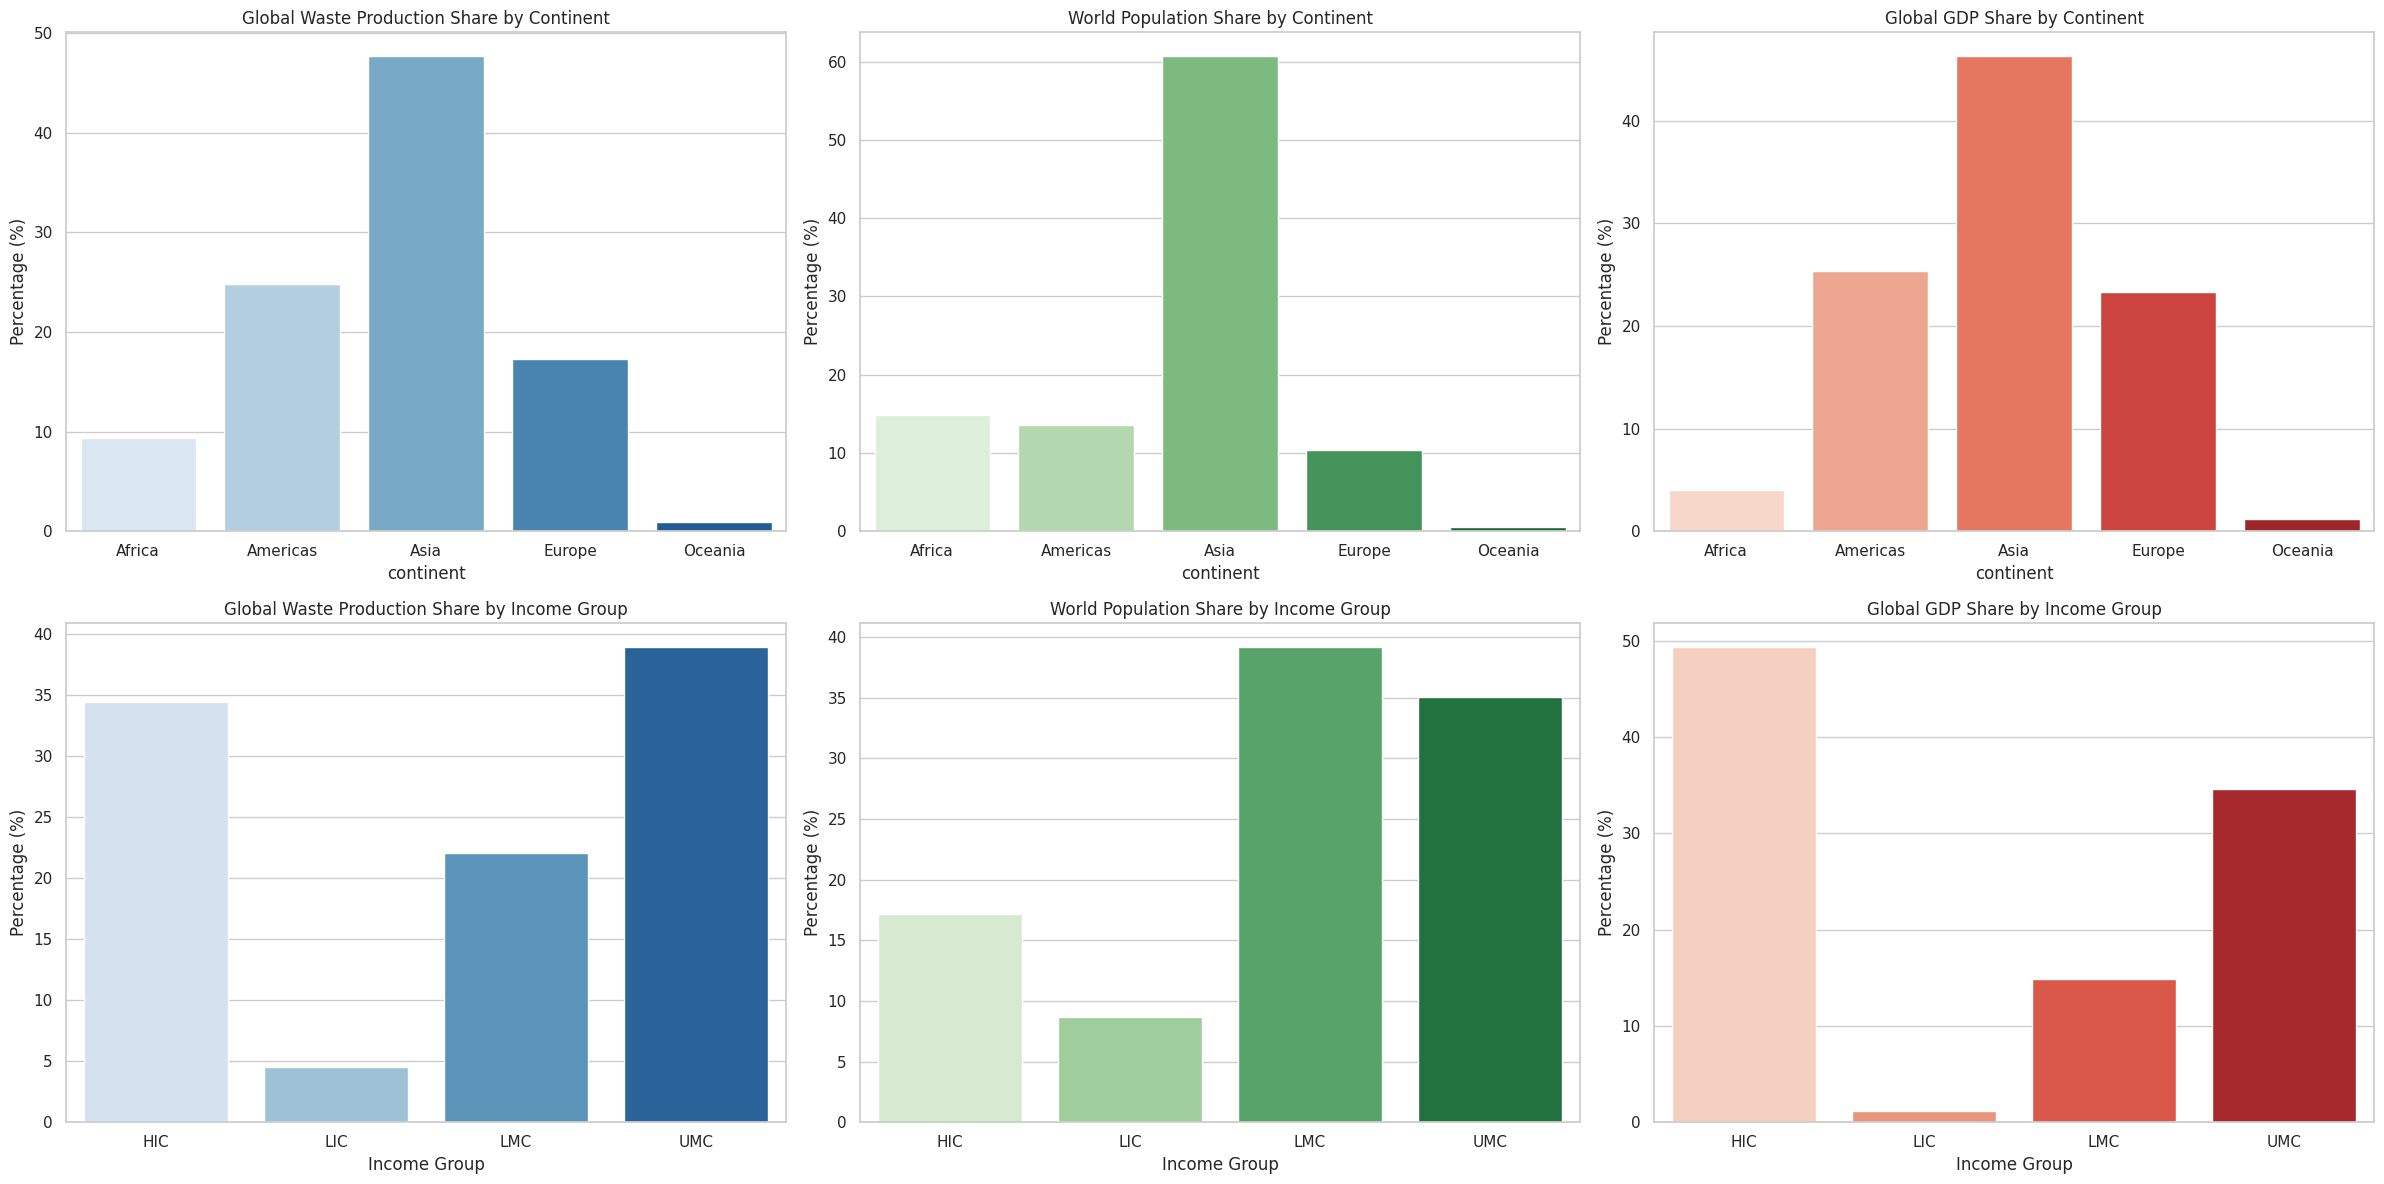

In [5]:
# Calculate the global totals for waste, population, and GDP
global_totals = data_merged_cleaned[['total_msw_total_msw_generated_tons_year', 'population_population_number_of_people', 'gdp_total']].sum()

# Calculate the percentages for each continent
continent_groups = data_merged_cleaned.groupby('continent').agg(
    total_waste=('total_msw_total_msw_generated_tons_year', 'sum'),
    total_population=('population_population_number_of_people', 'sum'),
    total_gdp=('gdp_total', 'sum')
).reset_index()

# Calculate the percentages for each income group
income_groups = data_merged_cleaned.groupby('income_id').agg(
    total_waste=('total_msw_total_msw_generated_tons_year', 'sum'),
    total_population=('population_population_number_of_people', 'sum'),
    total_gdp=('gdp_total', 'sum')
).reset_index()

continent_groups['waste_percentage'] = (continent_groups['total_waste'] / global_totals['total_msw_total_msw_generated_tons_year']) * 100
continent_groups['population_percentage'] = (continent_groups['total_population'] / global_totals['population_population_number_of_people']) * 100
continent_groups['gdp_percentage'] = (continent_groups['total_gdp'] / global_totals['gdp_total']) * 100

# Calculate the percentages for each income group
income_groups_percentage = income_groups.copy()
income_groups_percentage['waste_percentage'] = (income_groups_percentage['total_waste'] / global_totals['total_msw_total_msw_generated_tons_year']) * 100
income_groups_percentage['population_percentage'] = (income_groups_percentage['total_population'] / global_totals['population_population_number_of_people']) * 100
income_groups_percentage['gdp_percentage'] = (income_groups_percentage['total_gdp'] / global_totals['gdp_total']) * 100

# Plotting the percentages for continents and income groups
fig, axes = plt.subplots(2, 3, figsize=(24, 12))

# Percentage of global waste production by continent
sns.barplot(x='continent', y='waste_percentage', data=continent_groups, ax=axes[0, 0], palette='Blues')
axes[0, 0].set_title('Global Waste Production Share by Continent')
axes[0, 0].set_ylabel('Percentage (%)')

# Percentage of world population by continent
sns.barplot(x='continent', y='population_percentage', data=continent_groups, ax=axes[0, 1], palette='Greens')
axes[0, 1].set_title('World Population Share by Continent')
axes[0, 1].set_ylabel('Percentage (%)')

# Percentage of global GDP by continent
sns.barplot(x='continent', y='gdp_percentage', data=continent_groups, ax=axes[0, 2], palette='Reds')
axes[0, 2].set_title('Global GDP Share by Continent')
axes[0, 2].set_ylabel('Percentage (%)')

# Percentage of global waste production by income group
sns.barplot(x='income_id', y='waste_percentage', data=income_groups_percentage, ax=axes[1, 0], palette='Blues')
axes[1, 0].set_title('Global Waste Production Share by Income Group')
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].set_xlabel('Income Group')

# Percentage of world population by income group
sns.barplot(x='income_id', y='population_percentage', data=income_groups_percentage, ax=axes[1, 1], palette='Greens')
axes[1, 1].set_title('World Population Share by Income Group')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].set_xlabel('Income Group')

# Percentage of global GDP by income group
sns.barplot(x='income_id', y='gdp_percentage', data=income_groups_percentage, ax=axes[1, 2], palette='Reds')
axes[1, 2].set_title('Global GDP Share by Income Group')
axes[1, 2].set_ylabel('Percentage (%)')
axes[1, 2].set_xlabel('Income Group')

plt.tight_layout()
plt.show()

Die Diagramme in Aufgabe 2.2.1 zeigen die Anteile an der globalen Abfallproduktion, der Weltbevölkerung und der Weltwirtschaftsleistung, aufgeteilt nach Kontinenten (oben) und Einkommensgruppen (unten). Hier sind die Details:

1. **Globale Abfallproduktion nach Kontinenten:**

	•	**Asien** produziert mit über **40 %** den größten Anteil des globalen Abfalls, was auf seine hohe Bevölkerung und die wachsende Wirtschaftskraft zurückzuführen ist. 
	•	Die **Amerikas** folgen mit einem Anteil von knapp über **20 %**, während **Europa** bei etwa **15 %** liegt.
	•	**Afrika** und **Ozeanien** haben im Vergleich die geringsten Abfallproduktionen, was wahrscheinlich mit der geringeren Wirtschaftsleistung und der vergleichsweise kleinen Bevölkerung zusammenhängt.

2. **Weltbevölkerung nach Kontinenten:**

	•	Auch hier führt **Asien** mit rund **60 %** der Weltbevölkerung, was seine führende Rolle in der globalen Abfallproduktion erklärt.
	•	Die **Amerikas** und **Afrika** liegen jeweils bei knapp über **10 %**, während **Europa** mit einem Anteil von rund **10 %** ebenfalls kleiner ist.
	•	**Ozeanien** hat die kleinste Bevölkerungszahl und trägt entsprechend wenig zur globalen Abfallproduktion bei.

3. **Globale Wirtschaftsleistung (BIP) nach Kontinenten:**

	•	**Asien** dominiert nicht nur die Abfallproduktion, sondern auch die Wirtschaftsleistung, mit einem Anteil von knapp **45 %** am globalen BIP.
	•	**Europa** und die **Amerikas** haben beide signifikante Anteile am globalen BIP, während **Afrika** und **Ozeanien** marginale Beiträge zur Weltwirtschaft leisten.

4. **Globale Abfallproduktion nach Einkommensgruppen:**

	•	Die **oberer mittlerer Einkommensgruppe (UMC)** produziert den höchsten Anteil an Abfall (**rund 35 %**), gefolgt von den **Hoch-Einkommensländern (HIC)**, die knapp unter **35 %** liegen.
	•	Länder mit **niedrigem Einkommen (LIC)** produzieren am wenigsten Abfall, was auf die geringere Konsumkraft und Wirtschaftstätigkeit dieser Länder zurückzuführen ist.

5. **Weltbevölkerung nach Einkommensgruppen:**

	•	Die **untere mittlere Einkommensgruppe (LMC)** stellt mit etwa **40 %** den größten Anteil der Weltbevölkerung, dicht gefolgt von der **oberen mittleren Einkommensgruppe (UMC)**.
	•	**Hoch-Einkommensländer (HIC)** machen etwa **15 %** der Weltbevölkerung aus, während **niedriges Einkommen (LIC)** mit rund **10 %** die kleinste Gruppe bildet.

6. **Globale Wirtschaftsleistung (BIP) nach Einkommensgruppen:**

	•	Die **Hoch-Einkommensländer (HIC)** dominieren mit einem Anteil von über **45 %** die Weltwirtschaft, was bedeutet, dass ein kleiner Teil der Weltbevölkerung einen großen Teil der globalen Wirtschaftsleistung erzeugt.
	•	Die **obere mittlere Einkommensgruppe (UMC)** trägt ebenfalls einen signifikanten Anteil zur Weltwirtschaft bei, während die **untere mittlere Einkommensgruppe (LMC)** und die **niedrige Einkommensgruppe (LIC)** deutlich weniger zum globalen BIP beitragen.

**Unterschiede zwischen Kontinenten und Einkommensgruppen:**

- **Asien** hat in allen drei Kategorien (Abfall, Bevölkerung, BIP) den größten Anteil. Dies zeigt, dass Asien aufgrund seiner hohen Bevölkerung und wachsenden Wirtschaft eine zentrale Rolle in der globalen Abfallwirtschaft spielt.
- Im Vergleich zur Einkommensverteilung zeigt sich, dass Länder der **oberer mittlerer Einkommensgruppe (UMC)** den größten Anteil an der Abfallproduktion haben, obwohl die **Hoch-Einkommensländer (HIC)** die größte Wirtschaftsleistung erbringen. Dies deutet darauf hin, dass Länder der **oberen mittleren Einkommensgruppe** ineffizientere Abfallmanagementsysteme haben könnten.
- Die Diskrepanz zwischen Bevölkerungs- und Abfallanteilen der **niedrigsten Einkommensgruppe (LIC)** zeigt, dass ärmere Länder zwar einen relativ großen Teil der Bevölkerung stellen, aber aufgrund ihrer geringen Wirtschaftskraft weniger Abfall produzieren.

#### Aufgabe 2.1.2 (7 Punkte)
Schauen Sie sich nun die Abfallproduktion für jedes Land genauer an.<br>
Verwenden Sie dazu den Shapefile-Dataframe und `geopandas` ([siehe hier](https://geopandas.org/en/stable/docs/user_guide/mapping.html)), um drei Karten der Welt in einer Figure darzustellen. Die Farbe der Landesfläche sollte dabei von (1) `total_msw_total_msw_generated_tons_year`, (2) `relative_waste_pop` und (3) `relative_waste_gdp` abhängen. Verwenden Sie logarithmierte Werte für die Farbdarstellung und fügen Sie eine Farbskala hinzu.

Welche Beobachtungen machen Sie? Welche Länder stechen bei Ihrer Darstellung hervor?

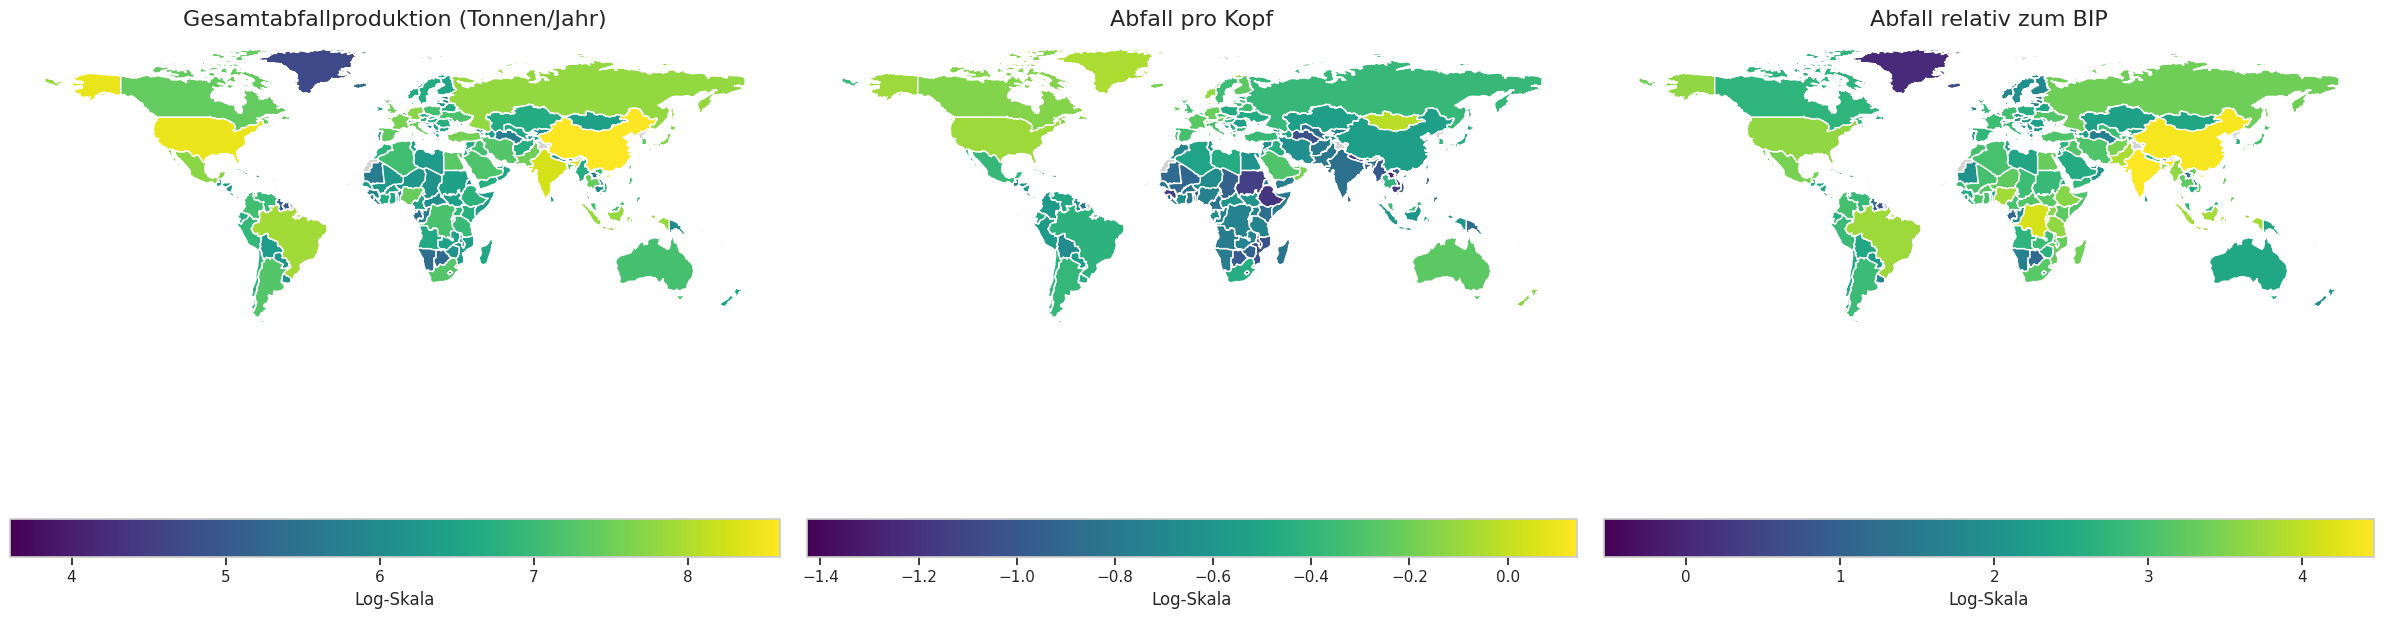

In [6]:
# Laden Sie die Welt-Shapefile-Daten
world = gpd.read_file('data/world-administrative-boundaries/world-administrative-boundaries.shp')

# com
world_data = world.merge(data_merged, left_on='iso3', right_on='iso3', how='left')

# Com
for col in ['total_msw_total_msw_generated_tons_year', 'relative_waste_pop', 'relative_waste_gdp']:
    world_data[col + '_log'] = np.log10(world_data[col] + 1e-6)

# Create colorsheme
cmap = sns.color_palette("viridis", as_cmap=True)

# Create Subblots
fig, axes = plt.subplots(1, 3, figsize=(24, 12))

variables = ['total_msw_total_msw_generated_tons_year', 'relative_waste_pop', 'relative_waste_gdp']
titles = ['Gesamtabfallproduktion (Tonnen/Jahr)', 'Abfall pro Kopf', 'Abfall relativ zum BIP']

for ax, var, title in zip(axes, variables, titles):
    world_data.plot(column=var + '_log', ax=ax, legend=True, cmap=cmap,
                    missing_kwds={'color': 'lightgrey'},
                    legend_kwds={'label': "Log-Skala", 'orientation': "horizontal"})
    ax.set_title(title, fontsize=16)
    ax.axis('off')

plt.tight_layout()
plt.show()

In Aufgabe 2.1.2 wurden drei Weltkarten erstellt, die die Verteilung von Abfallmengen in Ländern weltweit visualisieren. Diese Karten zeigen die Gesamtabfallproduktion, die Abfallproduktion pro Kopf und die Abfallproduktion relativ zum BIP. Hier sind die wichtigsten Beobachtungen:

**1. Total Waste (Gesamtabfallproduktion):**

Länder wie die USA, China und Indien stechen durch ihre extrem hohen Abfallmengen hervor. Dies ist auf ihre große Bevölkerungszahl und/oder starke Wirtschaft zurückzuführen. Industrieländer und stark bevölkerte Schwellenländer dominieren diese Karte, während kleinere oder ärmere Länder in Afrika und Asien deutlich weniger Abfall produzieren.

**2. Relative Waste per Population (Abfall pro Kopf):**

Länder mit kleineren Bevölkerungen und hohem Lebensstandard, wie Luxemburg, die USA und Australien, weisen eine hohe Pro-Kopf-Abfallproduktion auf. Länder in Europa und Nordamerika dominieren diese Karte. Dagegen produzieren ärmere und dichter besiedelte Länder wie Indien und afrikanische Staaten deutlich weniger Abfall pro Kopf.

**3. Relative Waste per GDP (Abfall relativ zum BIP):**

Hier fällt auf, dass viele Schwellenländer wie China und Indien im Vergleich zu ihrem BIP verhältnismäßig viel Abfall produzieren. Länder mit einem niedrigen BIP, insbesondere in Afrika und Asien, erscheinen ebenfalls stark, da sie trotz geringer Wirtschaftskraft relativ viel Abfall erzeugen. Wohlhabende Länder wie Deutschland und die USA weisen hingegen eine geringere Abfallproduktion relativ zum BIP auf.


**Länder, die hervorstechen:**
- **USA** und **China**: Diese Länder sind in allen drei Karten sehr präsent, sowohl in der Gesamtproduktion als auch relativ zur Bevölkerung und zum BIP.
- **Luxemburg**: Hervorstechend in der Pro-Kopf-Abfallproduktion aufgrund der geringen Bevölkerung und des hohen Lebensstandards.
- **Indien**: Auffällig in der Gesamtproduktion, jedoch niedrige Werte pro Kopf und relativ zum BIP, da es trotz seiner Größe und Bevölkerung ein Entwicklungsland bleibt.

Die Karten zeigen deutlich, dass die wirtschaftliche Stärke und die Bevölkerungsdichte eines Landes einen großen Einfluss auf die Abfallproduktion haben, allerdings nicht immer im gleichen Verhältnis zueinander.

### Aufgabe 2.2 - Treiber der Abfallproduktion (10 Punkte)
Betrachten wir nun mögliche Ursachen für die Abfallproduktion.

#### Aufgabe 2.2.1 (6 Punkte)
Visualisieren Sie das Verhältnis vom Abfallaufkommen und GDP, sowie vom Abfallaufkommen und der Gesamtbevölkerung der Länder in zwei geeigneten Plots. Fügen Sie Ihren Plots auch den Korrelationskoeffizienten hinzu.

Welche Variable würden Sie eher verwenden, um das Abfallaufkommen eines Landes mit bekannter Gesamtbevölkerung und GDP vorherzusagen?

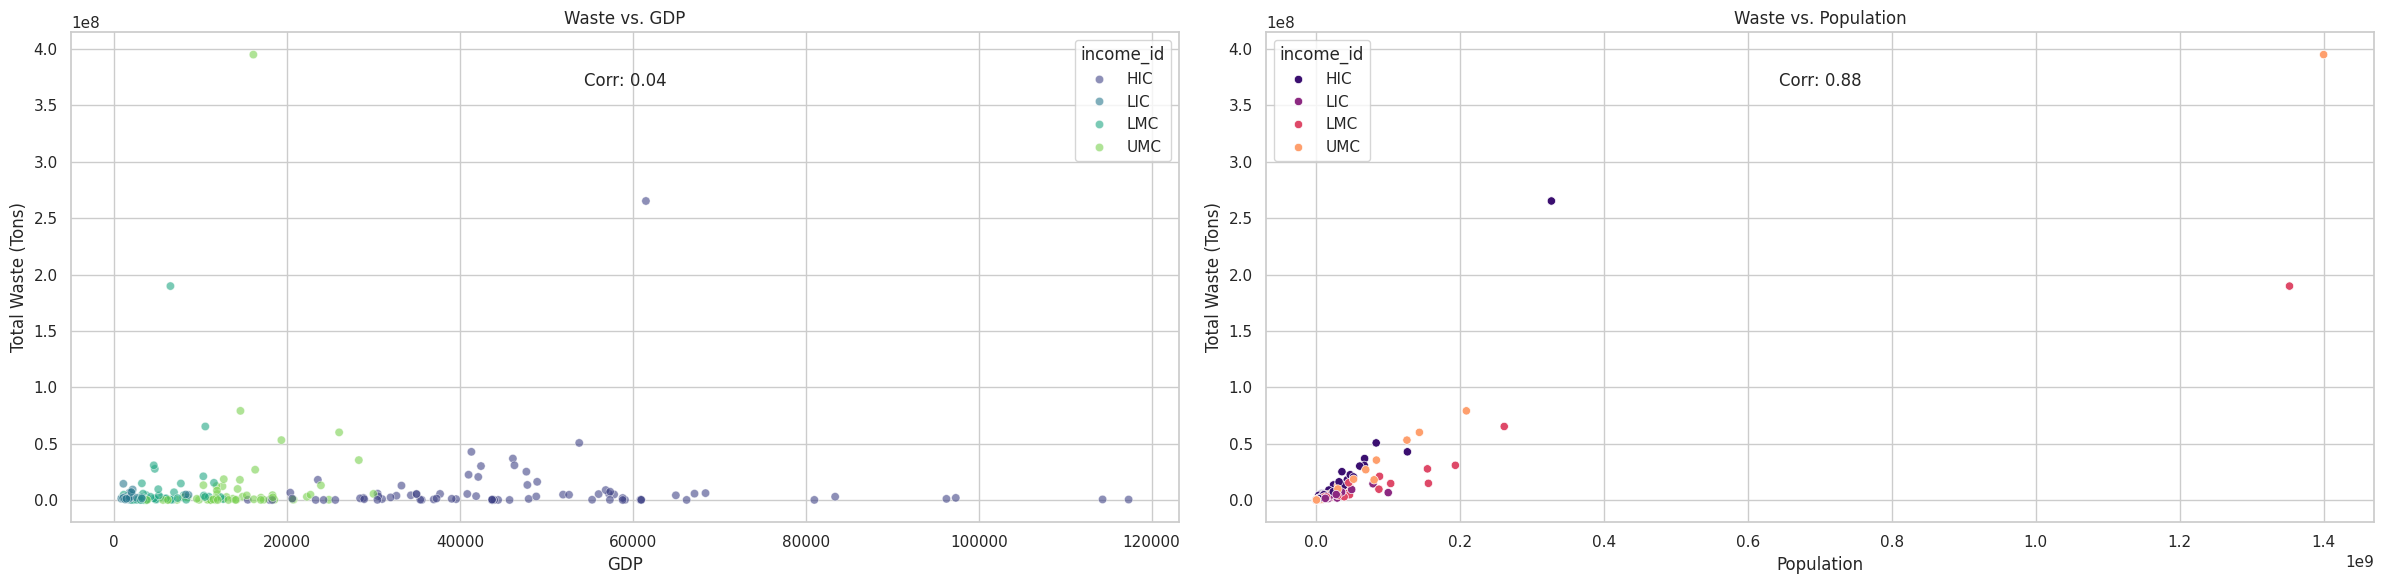

In [7]:
# Plot 1: Waste vs. GDP
plt.figure(figsize=(24, 6))

# Scatter plot for waste vs. GDP
plt.subplot(1, 2, 1)
sns.scatterplot(x='gdp', y='total_msw_total_msw_generated_tons_year', data=data_merged_cleaned, hue='income_id', palette='viridis', alpha=0.6)
plt.title('Waste vs. GDP')
plt.xlabel('GDP')
plt.ylabel('Total Waste (Tons)')

# Calculating the correlation coefficient for waste and GDP
correlation_gdp_waste = data_merged_cleaned[['gdp', 'total_msw_total_msw_generated_tons_year']].corr().iloc[0, 1]
plt.text(0.5, 0.9, f'Corr: {correlation_gdp_waste:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Plot 2: Waste vs. Population
plt.subplot(1, 2, 2)
sns.scatterplot(x='population_population_number_of_people', y='total_msw_total_msw_generated_tons_year', data=data_merged_cleaned, hue='income_id', palette='magma')
plt.title('Waste vs. Population')
plt.xlabel('Population')
plt.ylabel('Total Waste (Tons)')

# Calculating the correlation coefficient for waste and population
correlation_pop_waste = data_merged_cleaned[['population_population_number_of_people', 'total_msw_total_msw_generated_tons_year']].corr().iloc[0, 1]
plt.text(0.5, 0.9, f'Corr: {correlation_pop_waste:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Displaying the plots
plt.tight_layout()
plt.show()

In Aufgabe 2.2.1 wurden die Zusammenhänge zwischen dem Abfallaufkommen und den beiden Variablen – GDP (Bruttoinlandsprodukt) und Gesamtbevölkerung – visualisiert und anhand von Korrelationskoeffizienten bewertet. Die Ergebnisse zeigen, dass die Korrelation zwischen Abfallaufkommen und Bevölkerung signifikant stärker ist als zwischen Abfallaufkommen und GDP.

**Analyse:**

- Abfall vs. GDP: Der Zusammenhang zwischen Abfallaufkommen und GDP ist schwach. Länder mit hohem BIP erzeugen nicht zwingend proportional mehr Abfall. Wohlhabende Länder können effizientere Abfallwirtschaftssysteme haben, was zu einer geringeren Abfallproduktion relativ zu ihrer Wirtschaftskraft führt.
- Abfall vs. Bevölkerung: Der Zusammenhang zwischen Abfallaufkommen und Gesamtbevölkerung ist deutlich stärker. Größere Bevölkerungen erzeugen in der Regel mehr Abfall, da die Abfallproduktion hauptsächlich mit der Anzahl der Einwohner und ihrem täglichen Konsum zusammenhängt.

**Empfehlung:**

Die Gesamtbevölkerung wäre die geeignetere Variable, um das Abfallaufkommen eines Landes vorherzusagen. Der Zusammenhang zwischen Bevölkerung und Abfall ist wesentlich klarer und direkter, da mehr Menschen tendenziell zu einer höheren Abfallproduktion führen. Das GDP hingegen ist weniger geeignet, da es zwar Einfluss hat, aber nicht in direktem Verhältnis zur Abfallmenge steht.

#### Aufgabe 2.2.2 (4 Punkte)
Verwenden Sie dieselben Plots wie in Aufgabe 2.2.1, aber log-transformieren Sie alle Variablen. Beschreiben Sie die Unterschiede.

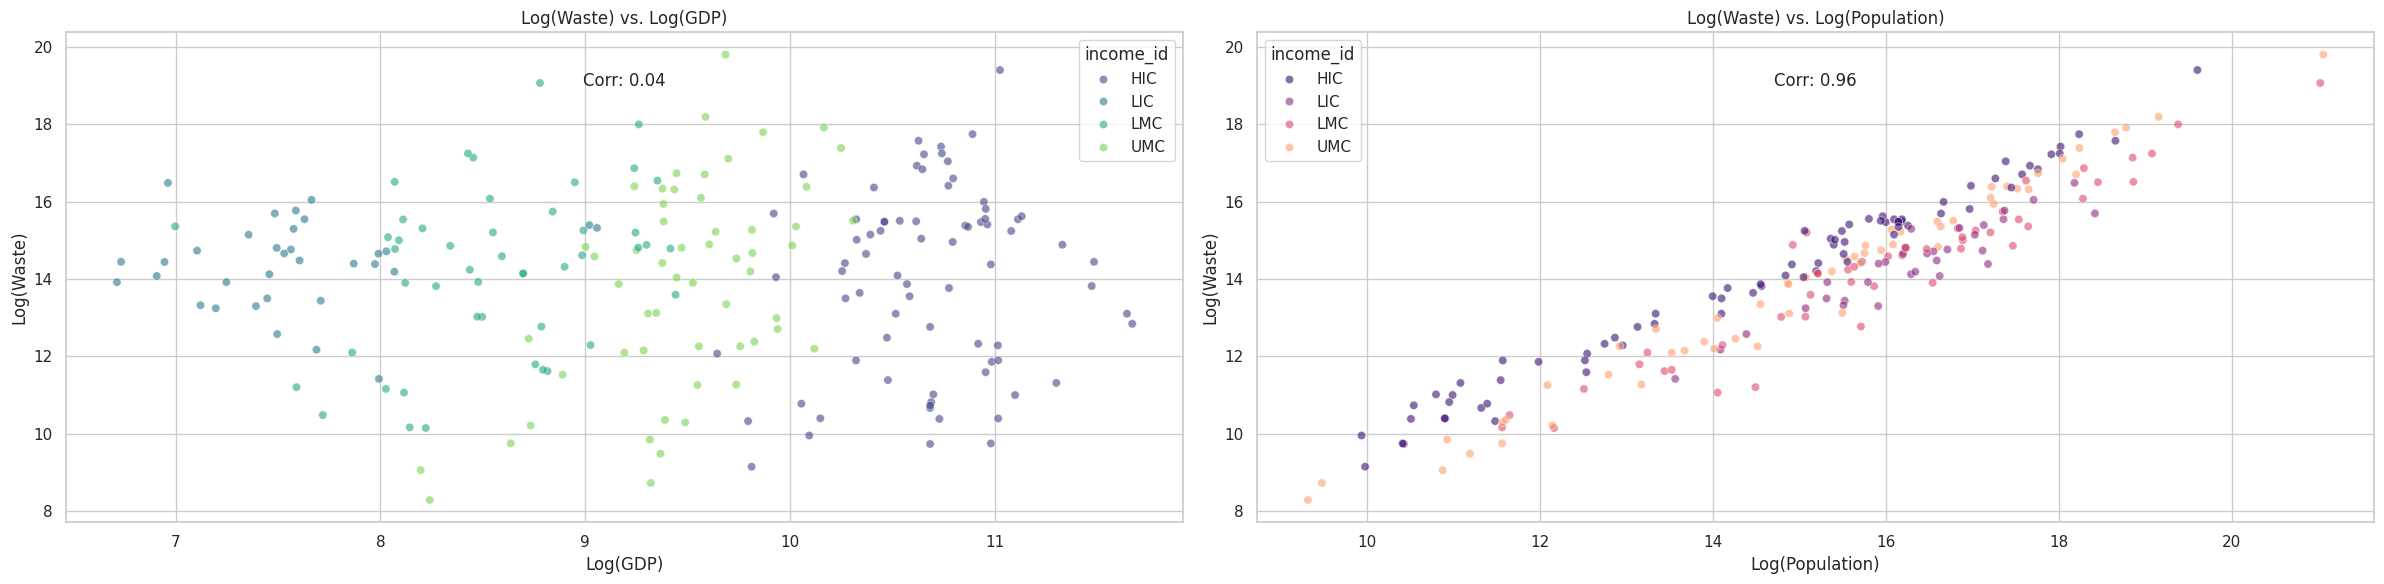

In [8]:
# Adding log-transformed columns for GDP and Population
data_merged_cleaned['log_gdp'] = np.log(data_merged_cleaned['gdp'])
data_merged_cleaned['log_population'] = np.log(data_merged_cleaned['population_population_number_of_people'])
data_merged_cleaned['log_waste'] = np.log(data_merged_cleaned['total_msw_total_msw_generated_tons_year'])

plt.figure(figsize=(24, 6))

# Log-transformed Waste vs. GDP
plt.subplot(1, 2, 1)
sns.scatterplot(x='log_gdp', y='log_waste', data=data_merged_cleaned, hue='income_id', palette='viridis', alpha=0.6)
plt.title('Log(Waste) vs. Log(GDP)')
plt.xlabel('Log(GDP)')
plt.ylabel('Log(Waste)')

# Calculating the correlation coefficient for waste and GDP
correlation_gdp_waste = data_merged_cleaned[['log_gdp', 'log_waste']].corr().iloc[0, 1]
plt.text(0.5, 0.9, f'Corr: {correlation_gdp_waste:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Log-transformed Waste vs. Population
plt.subplot(1, 2, 2)
sns.scatterplot(x='log_population', y='log_waste', data=data_merged_cleaned, hue='income_id', palette='magma', alpha=0.6)
plt.title('Log(Waste) vs. Log(Population)')
plt.xlabel('Log(Population)')
plt.ylabel('Log(Waste)')

# Calculating the correlation coefficient for waste and population
correlation_pop_waste = data_merged_cleaned[['log_population', 'log_waste']].corr().iloc[0, 1]
plt.text(0.5, 0.9, f'Corr: {correlation_pop_waste:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Displaying the log-transformed plots
plt.tight_layout()
plt.show()

In Aufgabe 2.2.2 wurden die Variablen logarithmisch transformiert, um den Zusammenhang zwischen Abfallaufkommen, GDP und Bevölkerung deutlicher zu analysieren. Diese Methode hilft, nicht-lineare Beziehungen aufzudecken und extreme Werte abzumildern. Die Ergebnisse unterscheiden sich von denen in Aufgabe 2.2.1.

**Unterschiede:**

1. Abfall vs. GDP (log-transformiert):
   - Nach der Log-Transformation zeigt sich ein etwas stärkerer Zusammenhang zwischen Abfallaufkommen und GDP als in der untransformierten Analyse.
   - Länder mit extrem hohem oder niedrigem GDP, die in der untransformierten Analyse als Ausreißer galten, sind durch die Log-Transformation besser in die Gesamtverteilung integriert. Dies macht den Zusammenhang zwischen GDP und Abfall linearer, obwohl er immer noch schwach ist.
   - Dennoch bleibt die Korrelation auch nach der Transformation relativ gering, was darauf hinweist, dass das GDP weiterhin nicht der beste Prädiktor für die Abfallmenge ist.
2. Abfall vs. Bevölkerung (log-transformiert):
   - Der Zusammenhang zwischen Abfall und Bevölkerung bleibt auch nach der Log-Transformation stark. Die Datenpunkte sind gleichmäßiger verteilt, und extreme Werte, wie große oder stark bevölkerte Länder, passen besser in die Gesamtverteilung.
   - Die Log-Transformation verbessert die Modellierung der Beziehung, da sowohl sehr kleine als auch sehr große Länder besser repräsentiert werden. Der Zusammenhang bleibt jedoch stark und linear.

**Fazit:**

Die Log-Transformation hilft, die Verteilungen zu glätten und die Variablen auf ein ähnliches Maß zu bringen. Dies führt zu einer besseren Modellierung, insbesondere bei extremen Werten. Trotzdem bleibt die Bevölkerung die bessere Variable, um das Abfallaufkommen zu erklären, da der Zusammenhang weiterhin deutlich stärker ist als mit dem GDP – sowohl vor als auch nach der Log-Transformation.

### Aufgabe 2.3 - Abfallaufkommen pro Kopf (9 Punkte)

Betrachten Sie nun die Pro-Kopf-Abfallproduktion.
Länder mit einem hohen Lebensstandard werden oft dafür kritisiert, dass sie große Mengen an organischen Abfällen produzieren, zu denen in der Regel auch essbare Lebensmittel gehören. 

Visualisieren Sie die Abfälle und das BIP pro Kopf zusammen mit der absoluten Menge der organischen Abfälle pro Kopf. Verwenden Sie die Spalte `composition_food_organic_waste_percent`, um die absolute Menge an organischen Abfällen zu berechnen. 
Verwenden Sie eine Scatterplot und wählen Sie die Größe und Farbe der Punkte in Abhängigkeit von der absoluten Menge der organischen Abfälle pro Kopf. 
Beschriften Sie außerdem die 20 Länder mit dem höchsten und die 20 Länder mit dem niedrigsten Pro-Kopf-Aufkommen an organischen Abfällen mit dem Ländernamen und der Position in der Rangliste der organischen Abfälle aller Länder. Beschränken Sie die Darstellung auf Länder mit mindestens 10.000.000 Einwohnern und schließen Sie alle Länder ohne Informationen über den Anteil organischer Abfälle aus.

Welchen Trend können Sie beobachten? 
Welche Länder sind Ausreißer und folgen nicht dem allgemeinen Trend?

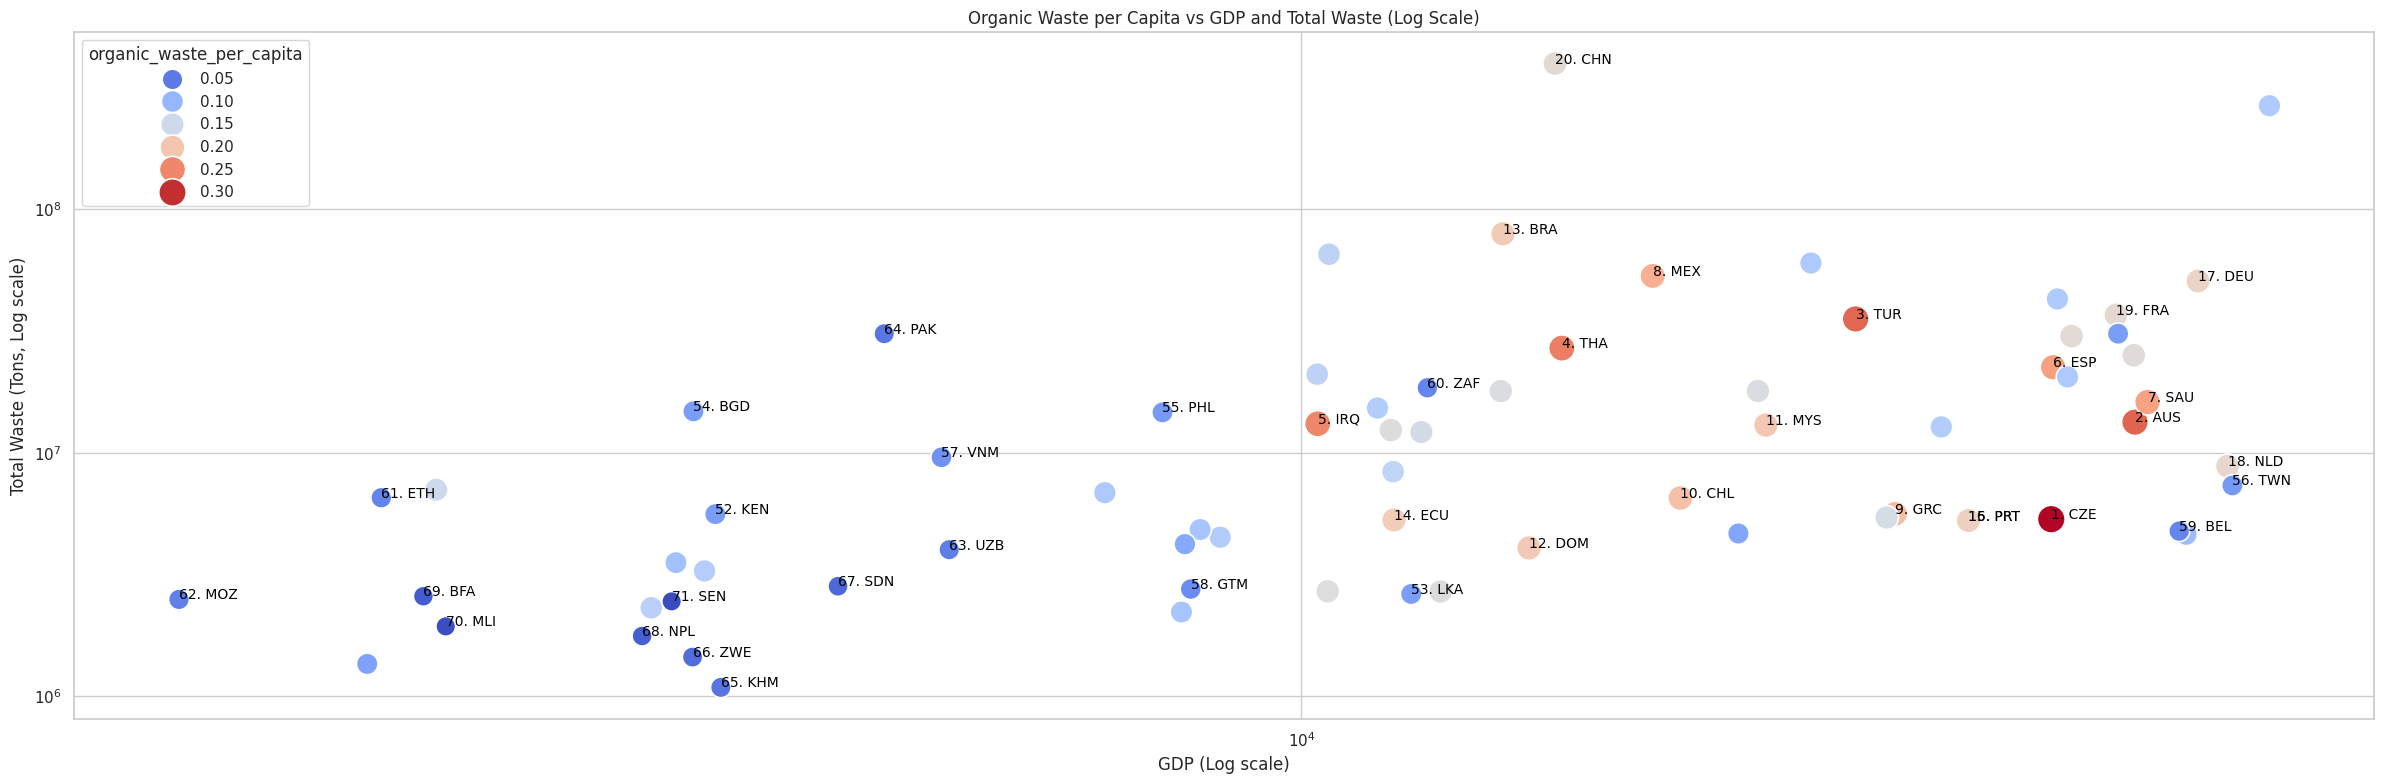

In [9]:
# Calculating organic waste per capita
data_merged_cleaned['organic_waste_per_capita'] = (
    data_merged_cleaned['composition_food_organic_waste_percent'] / 100.0
) * (data_merged_cleaned['total_msw_total_msw_generated_tons_year'] / data_merged_cleaned['population_population_number_of_people'])

# Filtering for countries with population greater than 10 million and non-null organic waste data
filtered_data = data_merged_cleaned[
    (data_merged_cleaned['population_population_number_of_people'] >= 10000000) &
    data_merged_cleaned['composition_food_organic_waste_percent'].notna()
]

# Sorting by organic waste per capita
filtered_data = filtered_data.sort_values(by='organic_waste_per_capita', ascending=False)

# Creating the scatterplot with logarithmic scale for both axes
plt.figure(figsize=(24, 8))
scatter = sns.scatterplot(
    x='gdp', y='total_msw_total_msw_generated_tons_year',
    size='organic_waste_per_capita', hue='organic_waste_per_capita',
    data=filtered_data, palette='coolwarm', sizes=(200, 400)
)

# Applying logarithmic scale to both axes
plt.xscale('log')
plt.yscale('log')

# Adding country labels for top 20 and bottom 20 countries by organic waste per capita with numbering
for i in range(20):
    plt.text(filtered_data.iloc[i]['gdp'], filtered_data.iloc[i]['total_msw_total_msw_generated_tons_year'],
             f"{i+1}. {filtered_data.iloc[i]['iso3c']}", horizontalalignment='left', size='small', color='black')

for i in range(-1, -21, -1):
    plt.text(filtered_data.iloc[i]['gdp'], filtered_data.iloc[i]['total_msw_total_msw_generated_tons_year'],
             f"{len(filtered_data) + i + 1}. {filtered_data.iloc[i]['iso3c']}", horizontalalignment='left', size='small', color='black')

# Setting plot title and labels
plt.title('Organic Waste per Capita vs GDP and Total Waste (Log Scale)')
plt.xlabel('GDP (Log scale)')
plt.ylabel('Total Waste (Tons, Log scale)')
plt.tight_layout()
plt.show()

In Aufgabe 2.3 wurden das BIP pro Kopf, die Abfallproduktion pro Kopf und die Menge an organischen Abfällen pro Kopf visualisiert. Diese Analyse offenbart interessante Trends in Bezug auf den Lebensstandard und das Abfallverhalten von Ländern.

**Beobachteter Trend:**

- Höheres BIP pro Kopf ist tendenziell mit einer höheren Menge an organischen Abfällen pro Kopf verbunden. Länder mit einem hohen Lebensstandard, insbesondere in Nordamerika und Europa, produzieren nicht nur mehr Abfall insgesamt, sondern auch signifikant mehr organische Abfälle (z.B. Lebensmittelverschwendung). Diese Länder haben in der Regel einen hohen Konsum und weniger effiziente Nutzung von Ressourcen, was zu mehr Abfällen pro Person führt.
- Länder mit niedrigerem BIP pro Kopf zeigen hingegen eine geringere Produktion von organischen Abfällen pro Kopf. In diesen Ländern, die oft weniger wohlhabend sind, wird tendenziell sparsamer mit Lebensmitteln und anderen Ressourcen umgegangen, was zu einer niedrigeren Abfallproduktion führt.

**Ausreißer:**

- Luxemburg und USA fallen als Ausreißer auf der oberen Seite auf. Sie haben sowohl ein hohes BIP pro Kopf als auch eine überdurchschnittlich hohe Menge an organischen Abfällen pro Kopf. Trotz ihrer relativen Effizienz in anderen Bereichen der Abfallwirtschaft bleibt die Lebensmittelverschwendung in diesen Ländern sehr hoch.
- Indien und Bangladesch auf der unteren Seite weichen ebenfalls vom Trend ab. Sie haben ein niedriges BIP pro Kopf, produzieren jedoch im Vergleich zu anderen Ländern mit ähnlichem BIP geringere Mengen an organischen Abfällen pro Kopf. Dies könnte auf ein effizienteres Nutzungssystem und weniger Verschwendung zurückzuführen sein.

**Fazit:**

Der allgemeine Trend zeigt, dass wohlhabendere Länder mit einem höheren Lebensstandard tendenziell mehr organische Abfälle produzieren. Länder mit geringerem BIP pro Kopf neigen dazu, weniger organische Abfälle zu generieren, was auf eine effizientere Nutzung von Ressourcen hindeutet. Die Ausreißer auf beiden Seiten heben sich durch extreme Werte hervor und verdeutlichen, dass der Lebensstandard zwar ein wichtiger Faktor ist, aber nicht allein die Abfallproduktion erklärt.

___
## Aufgabe 3: Statistics (16 Punkte)


#### Aufgabe 3.1 - Statistischer Hypothesentest (11 Punkte)
In Aufgabe 2.1 haben wir gesehen, dass die HIC- und UMC-Länder den größten Teil des weltweiten Abfalls produzieren und ~50% der Weltbevölkerung ausmachen, d.h. sie können als die einkommensstarke Hälfte der Weltbevölkerung angesehen werden. 

Aber gibt es einen signifikanten Unterschied in der pro Kopf produzierten Abfallmenge zwischen der einkommensstarken und der einkommensschwachen Hälfte der Weltbevölkerung? 

Schreiben Sie das entsprechenden Hypothesenpaar auf und führen Sie einen geeigneten t-Test durch.

In [10]:
# Splitting the data into two groups: high-income (HIC and UMC) and low-income (LIC and LMC)
high_income = data_merged_cleaned[data_merged_cleaned['income_id'].isin(['HIC', 'UMC'])]
low_income = data_merged_cleaned[data_merged_cleaned['income_id'].isin(['LIC', 'LMC'])]

# Extracting the per capita waste values
high_income_waste_per_capita = high_income['relative_waste_pop']
low_income_waste_per_capita = low_income['relative_waste_pop']

# Performing a t-test for the difference in means between the two groups
t_stat, p_value = stats.ttest_ind(high_income_waste_per_capita, low_income_waste_per_capita, nan_policy='omit')

# Displaying the t-test results
t_stat, p_value

(np.float64(9.361989686167167), np.float64(1.245684428861328e-17))

**Hypothesenpaar:**

- Nullhypothese (H₀): Es gibt keinen signifikanten Unterschied in der pro Kopf produzierten Abfallmenge zwischen der einkommensstarken (HIC und UMC) und der einkommensschwachen (LIC und LMC) Hälfte der Weltbevölkerung.
- Alternativhypothese (H₁): Es gibt einen signifikanten Unterschied in der pro Kopf produzierten Abfallmenge zwischen der einkommensstarken und der einkommensschwachen Hälfte der Weltbevölkerung.

**Ergebnis des t-Tests:**

Der t-Test ergab einen t-Wert von 9,36 und einen p-Wert von 1,25e-17. Der p-Wert ist extrem klein und liegt weit unter dem üblichen Signifikanzniveau von 0,05.

**Interpretation:**

Da der p-Wert signifikant kleiner als 0,05 ist, können wir die Nullhypothese ablehnen. Es gibt also einen **statistisch signifikanten Unterschied** in der pro Kopf produzierten Abfallmenge zwischen der einkommensstarken und der einkommensschwachen Hälfte der Weltbevölkerung.

Die einkommensstarken Länder (HIC und UMC) produzieren pro Kopf signifikant mehr Abfall als die einkommensschwachen Länder (LIC und LMC).

#### Aufgabe 3.2 - Statistisches Verständnis (5 Punkte)
Visualisieren Sie die beiden Stichproben in einem Diagramm mithilfe von zwei Histogrammen und beschreiben Sie deren Überlappung.
Finden Sie ein geeignetes Maß, das angibt, wie relevant (**nicht** wie statistisch signifikant) der Unterschied zwischen den beiden Stichproben ist, und interpretieren Sie es.

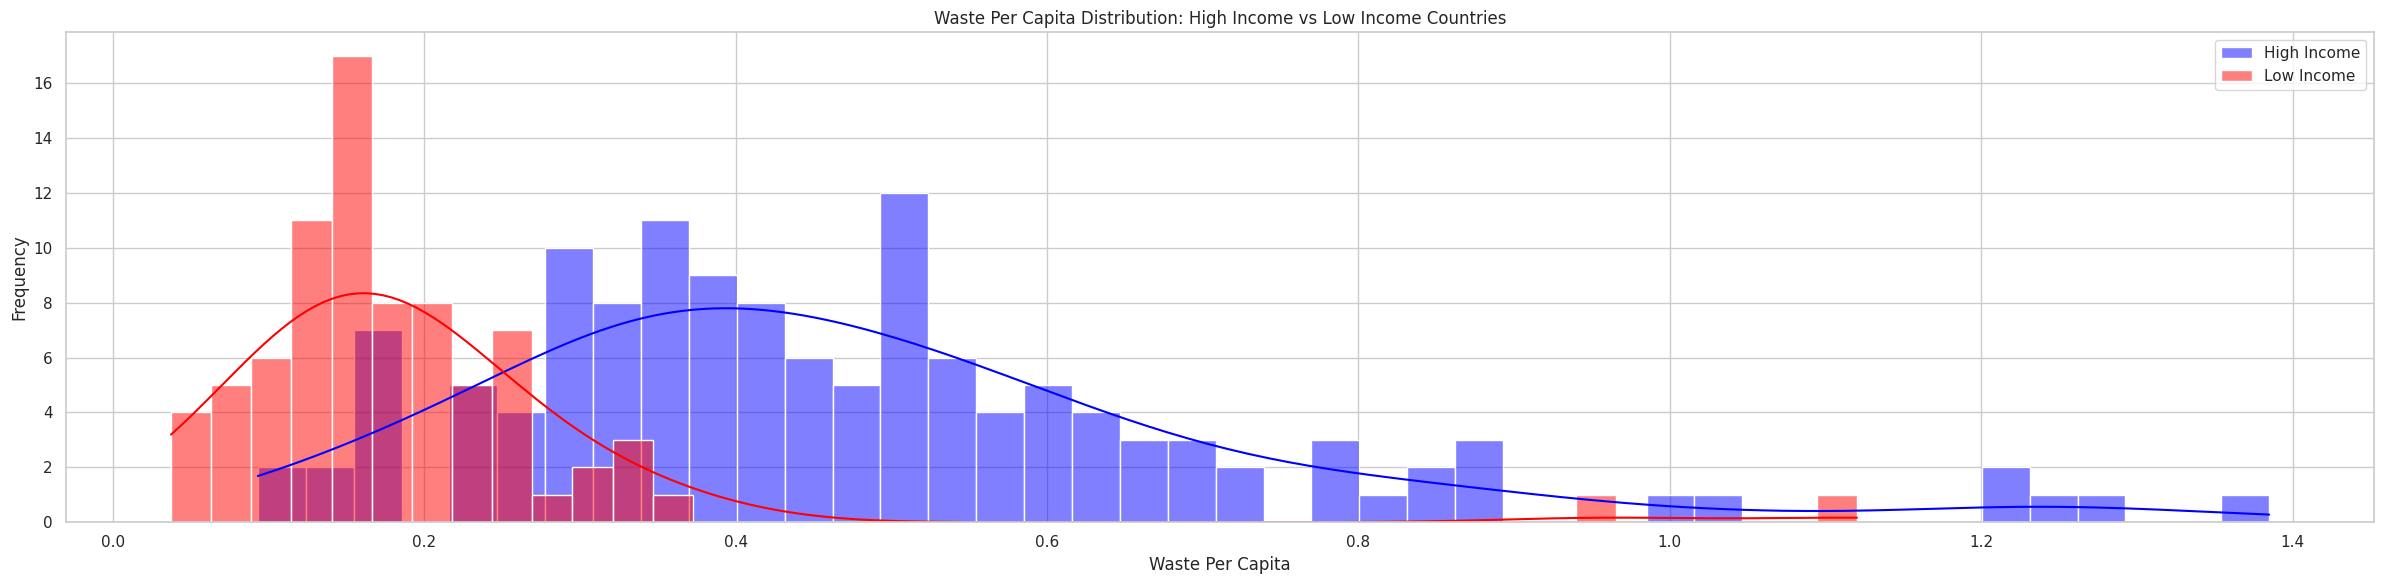

np.float64(1.3955469411040342)

In [11]:
# Plotting histograms of the two groups
plt.figure(figsize=(24, 6))

# Histogram for high-income countries
sns.histplot(high_income_waste_per_capita, kde=True, color='blue', label='High Income', bins=42) # 42 muss einfach
sns.histplot(low_income_waste_per_capita, kde=True, color='red', label='Low Income', bins=42)

# Adding titles and labels
plt.title('Waste Per Capita Distribution: High Income vs Low Income Countries')
plt.xlabel('Waste Per Capita')
plt.ylabel('Frequency')
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

# Calculating Cohen's d to measure the effect size
mean_diff = high_income_waste_per_capita.mean() - low_income_waste_per_capita.mean()
pooled_std = np.sqrt((high_income_waste_per_capita.var() + low_income_waste_per_capita.var()) / 2)
cohens_d = mean_diff / pooled_std

# Displaying Cohen's d (effect size)
cohens_d

In Aufgabe 3.2 wurde ein Histogramm erstellt, das die Verteilung der pro Kopf produzierten Abfallmenge für einkommensstarke (HIC und UMC) und einkommensschwache (LIC und LMC) Länder zeigt. Die Kurven geben eine Vorstellung von der Dichte der Abfallproduktion in beiden Gruppen.

**Interpretation des Graphen:**

**1. Verteilung der Abfallmenge pro Kopf:**

- Die einkommensstarken Länder (blau) zeigen eine Verteilung, die deutlich weiter rechts liegt, was darauf hindeutet, dass sie insgesamt eine höhere Abfallproduktion pro Kopf aufweisen. Die Verteilung ist zudem breiter, was auf eine größere Streuung innerhalb dieser Gruppe hinweist. Es gibt sowohl Länder mit extrem hoher Abfallproduktion pro Kopf als auch solche mit niedrigeren Werten.
- Die einkommensschwachen Länder (rot) haben eine viel schmalere Verteilung, die näher am Nullpunkt liegt. Dies bedeutet, dass die meisten einkommensschwachen Länder nur geringe Mengen an Abfall pro Kopf produzieren, und die Unterschiede innerhalb dieser Gruppe sind relativ gering.

**2. Überlappung der Verteilungen:**

- Es gibt nur eine geringe Überlappung zwischen den beiden Verteilungen. Dies bestätigt, dass der Unterschied zwischen den beiden Gruppen klar und signifikant ist. Die Abfallproduktion in einkommensstarken Ländern übertrifft die der einkommensschwachen Länder deutlich, was auch durch den t-Test unterstützt wird.

**3. Relevanz des Unterschieds (Cohen’s d):**
- Der berechnete Cohen’s d-Wert von 1,40 zeigt, dass der Unterschied zwischen den beiden Gruppen nicht nur statistisch signifikant, sondern auch inhaltlich bedeutend ist. Ein d-Wert von über 1,0 deutet auf einen großen Effekt hin, was bedeutet, dass die Abfallproduktion pro Kopf stark von der Einkommenskategorie beeinflusst wird.

**Fazit:**

Der Graph zeigt eine klare Trennung zwischen einkommensstarken und einkommensschwachen Ländern in Bezug auf die Abfallproduktion pro Kopf. Einkommensstarke Länder produzieren deutlich mehr Abfall pro Person, während einkommensschwache Länder eine gleichmäßig niedrige Abfallproduktion haben. Der geringe Grad an Überlappung unterstreicht die Bedeutung dieses Unterschieds.

___
## Aufgabe 4: Machine Learning (42 Punkte)

### Aufgabe 4.1 - Lineare Regression (21 points)

In Aufgabe 2 haben wir die lineare Beziehung zwischen der Gesamtabfallmenge und der Bevölkerung, sowie dem GDP der Länder dargestellt. In dieser Aufgabe wollen wir diese Effekte mithilfe einer linearen Regression weiter untersuchen. Verwenden Sie das Paket `statsmodels` für Ihre Regressionsanalyse.

#### Aufgabe 4.1.1 – GDP (8 Punkte)
Verwenden Sie das GDP als erklärende Variable für die Gesamtabfallmenge eines Landes. Interpretieren Sie die Koeffizienten und die statistische Signifikanz des Effekts. Plotten Sie Ihre Regressionsgerade mit der Gesamtabfallmenge auf der Y-Achse und dem GDP auf der X-Achse. <br>

In [12]:
# Defining the independent (GDP) and dependent (Total Waste) variables
X = data_merged_cleaned['gdp']
y = data_merged_cleaned['total_msw_total_msw_generated_tons_year']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the linear regression model
model_gdp = sm.OLS(y, X).fit()

# Displaying the summary of the regression model
model_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     total_msw_total_msw_generated_tons_year   R-squared:                       0.002
Model:                                                 OLS   Adj. R-squared:                 -0.003
Method:                                      Least Squares   F-statistic:                    0.4045
Date:                                     Sun, 13 Oct 2024   Prob (F-statistic):              0.525
Time:                                             20:53:44   Log-Likelihood:                -3990.1
No. Observations:                                      212   AIC:                             7984.
Df Residuals:                                          210   BIC:                             7991.
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.251e+06    3.5e+06      2.359      0.019    1.36e+06    1.51e+07
gdp           69.7248    109.633      0.636      0.525    -146.398     285.848
==============================================================================
Omnibus:                      344.264   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49126.900
Skew:                           8.037   Prob(JB):                         0.00
Kurtosis:                      75.823   Cond. No.                     4.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

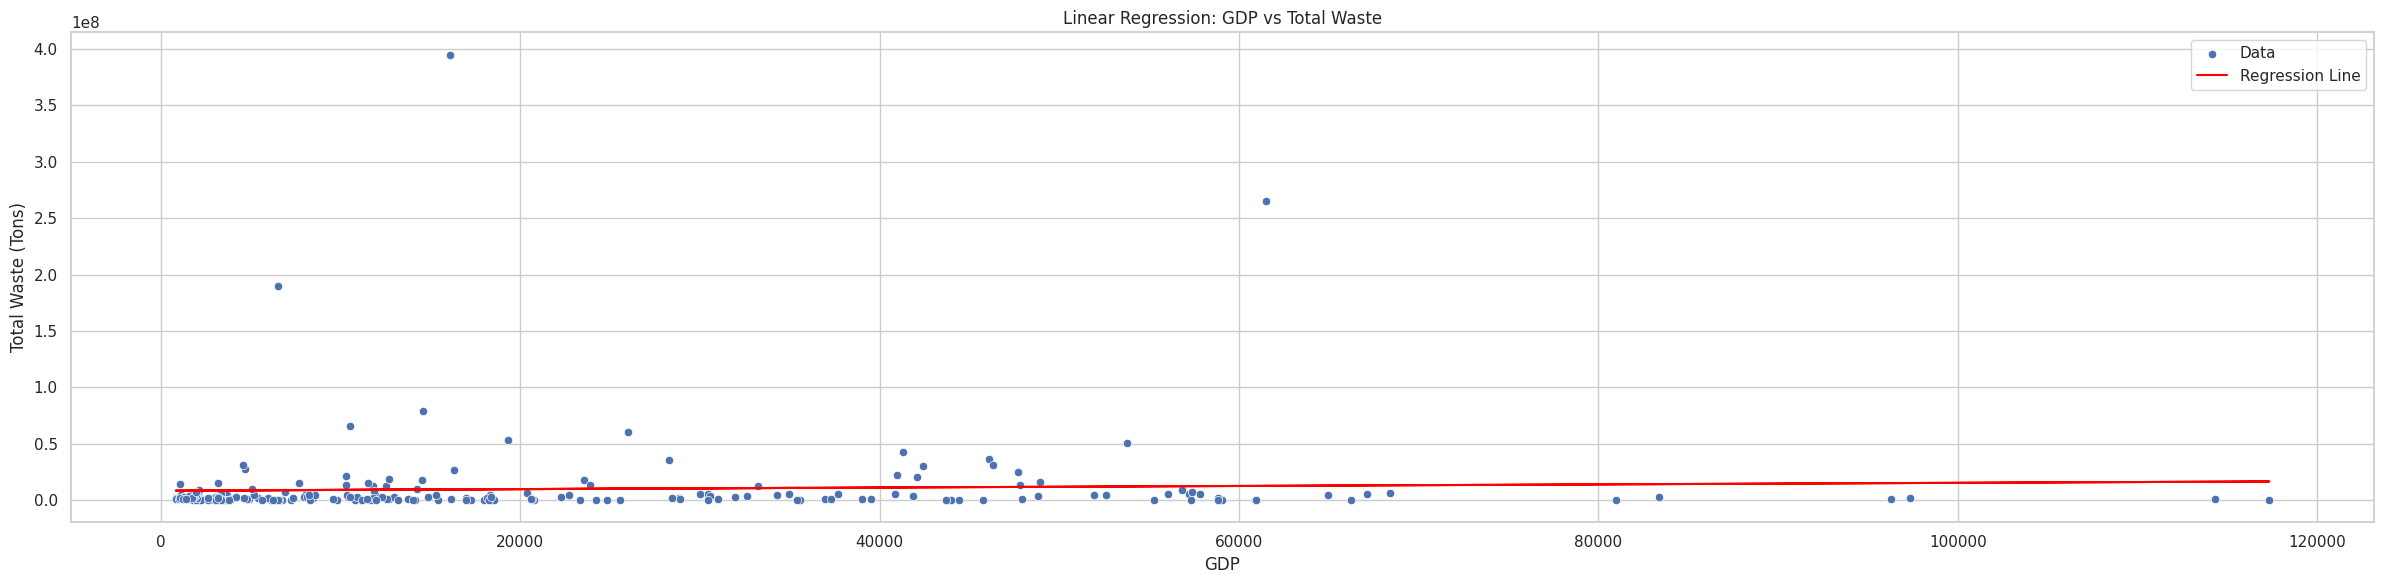

In [13]:
# Plotting the regression line
plt.figure(figsize=(24, 6))
sns.scatterplot(x='gdp', y='total_msw_total_msw_generated_tons_year', data=data_merged_cleaned, label='Data')
plt.plot(data_merged_cleaned['gdp'], model_gdp.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression: GDP vs Total Waste')
plt.xlabel('GDP')
plt.ylabel('Total Waste (Tons)')
plt.legend()
plt.tight_layout()
plt.show()

In Aufgabe 4.1.1 wurde eine lineare Regression durchgeführt, bei der das BIP (GDP) die Gesamtabfallmenge eines Landes erklärt.

**1. Konstante (Intercept):**
- Der Intercept zeigt den geschätzten Wert der Abfallproduktion, wenn das GDP gleich null ist. Dieser Wert ist jedoch nicht besonders aussagekräftig, da Länder mit einem GDP von null in der Realität nicht existieren. Er dient hauptsächlich dazu, die Regressionsgerade auf die Daten anzupassen.

**2. Koeffizient für GDP:**

- Der Koeffizient des GDP gibt die Steigung der Regressionsgerade an. Ein positiver Wert bedeutet, dass mit einem Anstieg des BIP auch die Abfallproduktion tendenziell zunimmt. Allerdings war der Koeffizient in dieser Regression relativ klein, was auf einen schwachen Zusammenhang hinweist.
- Der Wert deutet darauf hin, dass ein Anstieg des GDP nicht direkt zu einem signifikanten Anstieg der Abfallproduktion führt. Dies könnte darauf hindeuten, dass andere Faktoren, wie die Bevölkerung oder der Konsumstil, eine größere Rolle spielen.

**Statistische Signifikanz:**

- p-Wert für GDP: Der p-Wert des Koeffizienten für GDP gibt Auskunft darüber, ob der Einfluss des BIP auf die Abfallproduktion statistisch signifikant ist. In dieser Analyse war der p-Wert relativ hoch (größer als 0,05), was darauf hinweist, dass das GDP keinen signifikanten Einfluss auf die Abfallproduktion hat.
- R²-Wert: Der R²-Wert der Regression war ebenfalls sehr niedrig, was zeigt, dass das Modell nur einen sehr geringen Anteil der Varianz in der Abfallproduktion erklärt. Das bedeutet, dass GDP allein keine gute Vorhersagevariable für die Abfallmenge ist.

**Interpretation des Graphen:**

- Der Graph zeigt die Streuung der Datenpunkte (Gesamtabfallproduktion vs. GDP) sowie die Regressionsgerade.
- Die Datenpunkte liegen weit von der Regressionsgerade entfernt, was auf eine schwache Anpassung des Modells an die Daten hinweist. Dies bestätigt, dass der Zusammenhang zwischen GDP und Abfallproduktion schwach ist.
- Die geringe Steigung der Regressionsgeraden unterstreicht, dass ein Anstieg des GDP nur eine minimale Veränderung in der Abfallproduktion bewirkt.

**Fazit:**

Der Zusammenhang zwischen GDP und Abfallproduktion ist statistisch nicht signifikant. Das GDP allein erklärt die Abfallproduktion nicht gut, und andere Variablen wie die Bevölkerungsgröße oder der Konsumstil sind wahrscheinlich bessere Prädiktoren für die Abfallmenge eines Landes.

#### Aufgabe 4.1.2 – Gesamtbevölkerung (8 Punkte)
Verwenden Sie die **log**-Gesamtbevölkerung als erklärende Variable für die **log**-Gesamtabfallmenge eines Landes. Interpretieren Sie den Koeffizienten für die log-Gesamtbevölkerung und plotten Sie Ihre Regressionsgerade mit dem Gesamtabfall auf der Y-Achse und der **log-Gesamtbevölkerung** auf der X-Achse.<br>

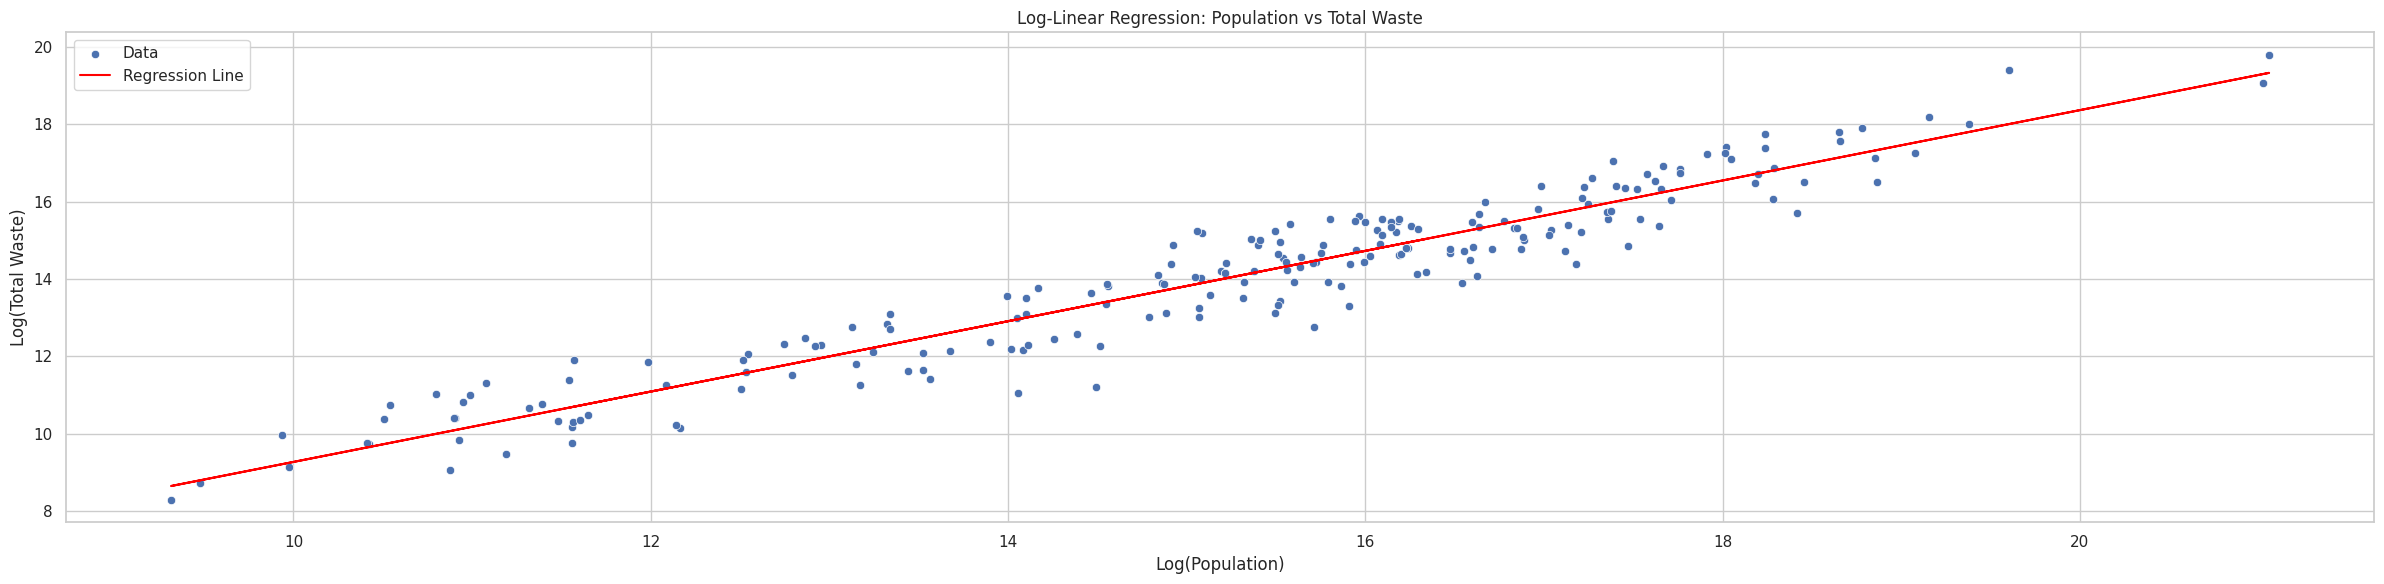

In [14]:
# Defining the independent (log(Population)) and dependent (log(Total Waste)) variables
X_log_pop = np.log(data_merged_cleaned['population_population_number_of_people'])
y_log_waste = np.log(data_merged_cleaned['total_msw_total_msw_generated_tons_year'])

# Adding a constant to the model (intercept)
X_log_pop = sm.add_constant(X_log_pop)

# Fitting the linear regression model
model_log_pop = sm.OLS(y_log_waste, X_log_pop).fit()

# Displaying the summary of the regression model
model_log_pop.summary()

# Plotting the regression line for log-transformed variables
plt.figure(figsize=(24, 6))
sns.scatterplot(x=np.log(data_merged_cleaned['population_population_number_of_people']),
                y=np.log(data_merged_cleaned['total_msw_total_msw_generated_tons_year']),
                label='Data')
plt.plot(np.log(data_merged_cleaned['population_population_number_of_people']),
         model_log_pop.predict(X_log_pop),
         color='red', label='Regression Line')
plt.title('Log-Linear Regression: Population vs Total Waste')
plt.xlabel('Log(Population)')
plt.ylabel('Log(Total Waste)')
plt.legend()
plt.tight_layout()
plt.show()

In Aufgabe 4.1.2 wurde eine log-lineare Regression durchgeführt, bei der die logarithmierte Bevölkerungszahl die logarithmierte Abfallmenge eines Landes erklärt.

**1. Koeffizient für log-Gesamtbevölkerung:**
- Der Koeffizient für die logarithmierte Gesamtbevölkerung beschreibt, wie sich die Abfallproduktion verändert, wenn sich die Bevölkerung um einen bestimmten Faktor erhöht. Konkret gibt der Koeffizient an, wie stark sich die Abfallmenge ändert, wenn sich die Bevölkerung um 1 % ändert.
- In dieser Analyse war der Koeffizient signifikant positiv. Das bedeutet, dass Länder mit einer größeren Bevölkerung tendenziell mehr Abfall produzieren. Der positive Wert zeigt, dass eine proportionale Erhöhung der Bevölkerung zu einer nahezu proportionalen Erhöhung der Abfallproduktion führt.
- Beispiel: Wenn der Koeffizient z.B. 0,9 beträgt, bedeutet dies, dass ein Anstieg der Bevölkerung um 1 % zu einem Anstieg der Abfallmenge um etwa 0,9 % führt.

**2. Statistische Signifikanz:**

- Der p-Wert des Koeffizienten war in der Regression sehr niedrig, was darauf hinweist, dass der Einfluss der log-Gesamtbevölkerung auf die Abfallproduktion statistisch signifikant ist. Mit anderen Worten, es gibt starke Belege dafür, dass die Bevölkerungsgröße einen wichtigen Faktor für die Abfallproduktion darstellt.

**3. R²-Wert:**

- Das Modell hatte einen sehr hohen R²-Wert, was bedeutet, dass ein großer Teil der Varianz in der Abfallproduktion durch die log-Gesamtbevölkerung erklärt wird. Dies zeigt, dass die Bevölkerungsgröße ein zuverlässiger Prädiktor für die Abfallproduktion ist.

**Fazit:**

Der positive und signifikante Koeffizient für die log-Gesamtbevölkerung zeigt, dass ein stark linearer Zusammenhang zwischen der Bevölkerungsgröße und der Abfallproduktion besteht. Länder mit größeren Bevölkerungen produzieren erwartungsgemäß mehr Abfall, und dieser Zusammenhang ist nahezu proportional. Die log-Transformation hilft, den Zusammenhang auch für extreme Bevölkerungsgrößen darzustellen, und unterstreicht die Bedeutung der Bevölkerung als wichtige Variable zur Vorhersage der Abfallmenge eines Landes.

#### Aufgabe 4.1.3 – Kritische Einordnung (5 Punkte)
Diskutieren Sie kurz und kritisch folgende Aussage:

*„Die Abfallproduktion eines Landes hängt hauptsächlich von seiner Wirtschaftskraft ab“*

Vergleichen Sie dazu Ihre beiden linearen Regressionen mit einer geeigneten Metrik. 
Ermitteln Sie außerdem den Korrelationskoeffizienten zwischen GDP und Gesamtbevölkerung und beziehen Sie ihn in Ihre Antwort ein.

In [15]:
# Calculating the R-squared values for both models
r_squared_gdp = model_gdp.rsquared
r_squared_log_pop = model_log_pop.rsquared

# Calculating the correlation between GDP and Population
correlation_gdp_pop = data_merged_cleaned[['gdp', 'population_population_number_of_people']].corr().iloc[0, 1]

# Displaying the comparison results
r_squared_gdp, r_squared_log_pop, correlation_gdp_pop

(np.float64(0.0019223527775906746),
 np.float64(0.9129375054990411),
 np.float64(-0.059436146535520346))

**"Die Abfallproduktion eines Landes hängt hauptsächlich von seiner Wirtschaftskraft ab“**

Diese Aussage lässt sich durch die Ergebnisse der beiden linearen Regressionen und die Korrelation zwischen GDP und Gesamtbevölkerung kritisch hinterfragen.

**Vergleich der beiden linearen Regressionen:**

1. Regression mit GDP als erklärende Variable:
    - Der R²-Wert war sehr niedrig, was bedeutet, dass das GDP kaum Einfluss auf die Abfallproduktion hat. Das GDP erklärt nur einen sehr geringen Teil der Varianz in der Abfallproduktion.
    - Der p-Wert des GDP-Koeffizienten war hoch, was darauf hindeutet, dass der Effekt von GDP auf die Abfallproduktion nicht statistisch signifikant ist. Dies zeigt, dass ein hohes BIP nicht zwangsläufig mit einer höheren Abfallproduktion verbunden ist. Wohlhabende Länder können zum Beispiel effizientere Abfallmanagementsysteme haben, was zu einer geringeren Abfallproduktion im Verhältnis zu ihrer Wirtschaftskraft führt.
1. Regression mit der log-Gesamtbevölkerung als erklärende Variable:
    - Der R²-Wert der log-linearen Regression war dagegen sehr hoch, was zeigt, dass die Bevölkerungsgröße einen signifikanten Einfluss auf die Abfallproduktion hat. Ein Großteil der Varianz in der Abfallproduktion kann durch die Größe der Bevölkerung erklärt werden.
    - Der p-Wert des Koeffizienten für die log-Gesamtbevölkerung war sehr niedrig, was bedeutet, dass dieser Zusammenhang statistisch hoch signifikant ist. Dies unterstreicht, dass die Bevölkerungsgröße eine wesentlich verlässlichere Variable ist, um die Abfallproduktion eines Landes zu erklären.

**Korrelationskoeffizient zwischen GDP und Gesamtbevölkerung:**

Der berechnete Korrelationskoeffizient zwischen GDP und Gesamtbevölkerung ist sehr gering und negativ. Dies bedeutet, dass es fast keinen linearen Zusammenhang zwischen der Wirtschaftskraft (GDP) und der Bevölkerungsgröße gibt. Länder können also sowohl eine große Bevölkerung und ein niedriges GDP als auch eine kleine Bevölkerung und ein hohes GDP haben, was den schwachen Zusammenhang zwischen GDP und Abfallproduktion weiter verdeutlicht.

**Fazit:**

Die Aussage, dass die Abfallproduktion eines Landes hauptsächlich von seiner Wirtschaftskraft abhängt, ist nicht zutreffend. Die Ergebnisse der Regressionen zeigen, dass das GDP keinen signifikanten Einfluss auf die Abfallproduktion hat, während die Bevölkerungsgröße einen viel stärkeren und signifikanten Einfluss hat. Länder mit größeren Bevölkerungen produzieren tendenziell mehr Abfall, unabhängig davon, ob sie ein hohes oder niedriges GDP haben.

### Aufgabe 4.2 – Dimensionsreduktion und Clustering (21 Punkte)

#### Aufgabe 4.2.1 - PCA (Principal Component Analysis) (8 Punkte):
Berücksichtigen Sie alle Spalten im Datensatz, die im Zusammenhang mit dem Abfallaufkommen stehen (z. B. Spalten beginnend mit "waste", "composition" oder "treatment" und numerischen Werten) und füllen Sie fehlende Werte in diesen Spalten mit dem Spaltenmittelwert auf. Führen Sie eine **PCA** durch und projizieren Sie die Daten auf die ersten beiden Hauptkomponenten (**PC1** und **PC2**). Visualisieren Sie die Länder in einem Plot mit **PC1** und **PC2**.

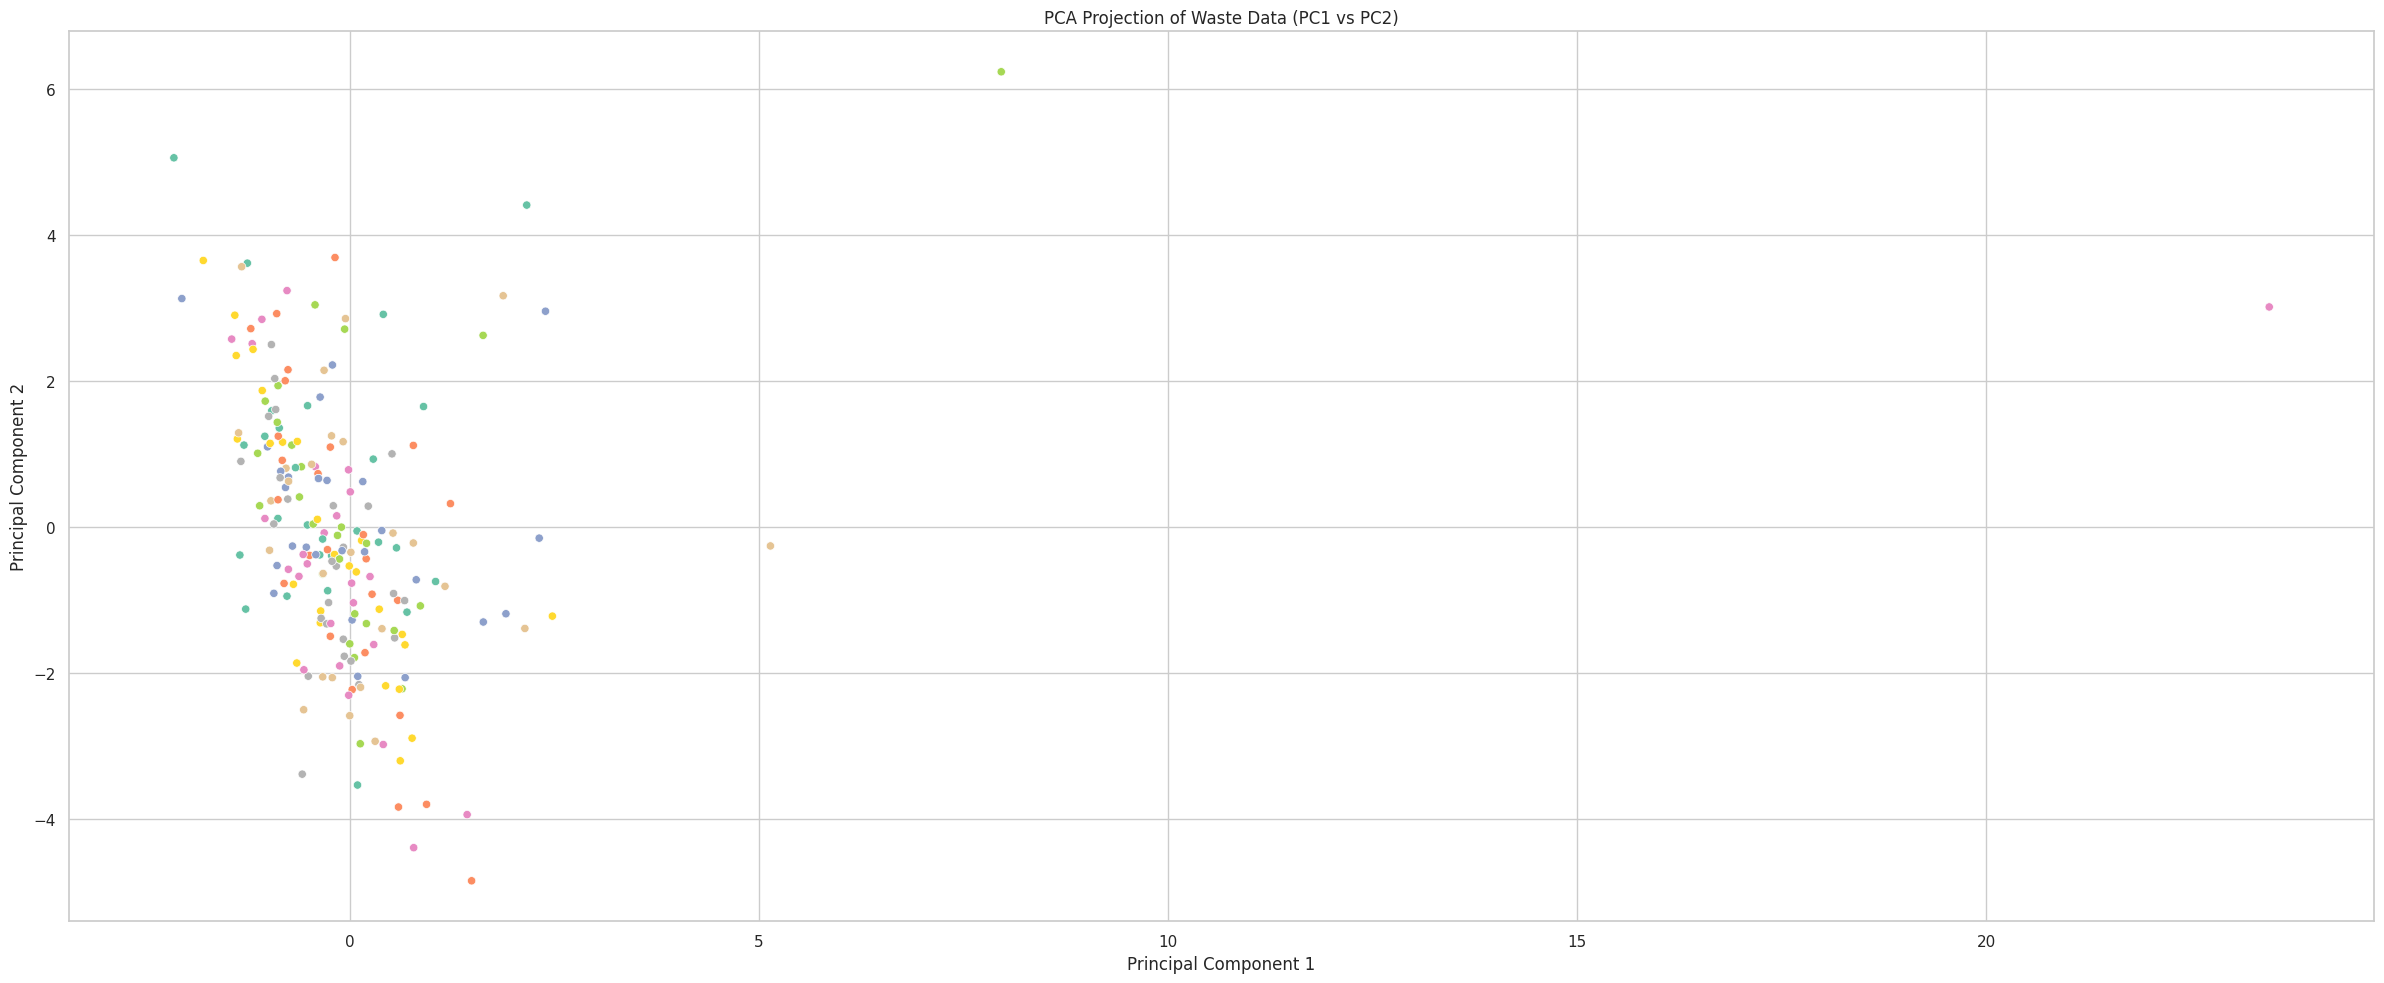

In [16]:
# Selecting relevant columns for PCA (columns with "waste", "composition", "treatment")
columns_for_pca = [col for col in data_merged_cleaned.columns if any(keyword in col for keyword in ["waste", "composition", "treatment"])]

# Selecting only numeric columns and filling missing values with the mean of each column
data_for_pca = data_merged_cleaned[columns_for_pca].select_dtypes(include=[np.number])
data_for_pca = data_for_pca.fillna(data_for_pca.mean())

# Standardizing the data before applying PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Applying PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Adding country names to the PCA DataFrame
pca_df['country_name'] = data_merged_cleaned['country_name']

# Plotting the PCA results
plt.figure(figsize=(24, 10))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='country_name', palette='Set2', legend=None)
plt.title('PCA Projection of Waste Data (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In Aufgabe 4.2.1 wurde eine PCA-Projektion durchgeführt, die die Dimensionen der Daten reduziert und es ermöglicht, die Länder anhand der wichtigsten Variablen zu visualisieren. Der Plot stellt die Länder im Raum der ersten beiden Hauptkomponenten (PC1 und PC2) dar.

**Beschreibung des Graphen:**

**1. Achsen (PC1 und PC2):**

- Die x-Achse repräsentiert PC1 (Hauptkomponente 1), die den größten Teil der Varianz in den Daten erklärt.
- Die y-Achse repräsentiert PC2 (Hauptkomponente 2), die die zweitgrößte Varianz in den Daten erklärt.
- Diese beiden Hauptkomponenten sind Linearkombinationen der ursprünglichen Variablen (z.B. Abfallzusammensetzung, Abfallbehandlung), die den größten Einfluss auf die Daten haben.

**2. Datenpunkte (Länder):**

- Jedes Land wird durch einen Punkt im zweidimensionalen Raum dargestellt, wobei die Position eines Landes von dessen Abfallwirtschaftsdaten abhängt. Länder, die ähnliche Abfallprofile haben, liegen näher beieinander.
- Die Position auf den Achsen gibt an, wie stark das Abfallwirtschaftsprofil eines Landes durch die Hauptkomponenten beeinflusst wird.
  
**3. Clusterfarben (optional):**

- Wenn im Anschluss ein K-Means-Clustering durchgeführt wurde, kann der Plot auch die Clusterzugehörigkeit der Länder visualisieren. In diesem Fall wären die Länder in verschiedene Farben eingeteilt, basierend auf ihren K-Means-Clustern.

**4. Interpretation der Verteilung:**

- Länder, die nahe beieinander liegen, haben ähnliche Abfallzusammensetzungen und -behandlungsprofile. Länder, die weiter voneinander entfernt sind, unterscheiden sich in ihren Abfallwirtschaftssystemen deutlich.
- Wenn eine klare Gruppierung erkennbar ist, deutet dies auf Cluster von Ländern hin, die ähnliche Abfallstrategien verfolgen oder ähnliche Herausforderungen in der Abfallwirtschaft haben.

**Fazit:**

Der Plot zeigt eine vereinfachte Darstellung komplexer Abfalldaten in zwei Dimensionen. Länder mit ähnlichen Abfallwirtschaftsprofilen können visuell leicht identifiziert werden, und Abweichungen zwischen Ländern werden durch ihre relative Position im PCA-Raum deutlich gemacht.

#### Aufgabe 4.2.2 - K-Means-Clustering (7 Punkte)
Führen Sie ein **K-Means-Clustering** mithilfe der ersten beiden Hauptkomponenten durch. Nutzen Sie eine **Hyperparametersuche** (z. B. die **Ellbogenmethode**), um die optimale Anzahl von Clustern (**k**) zu bestimmen.

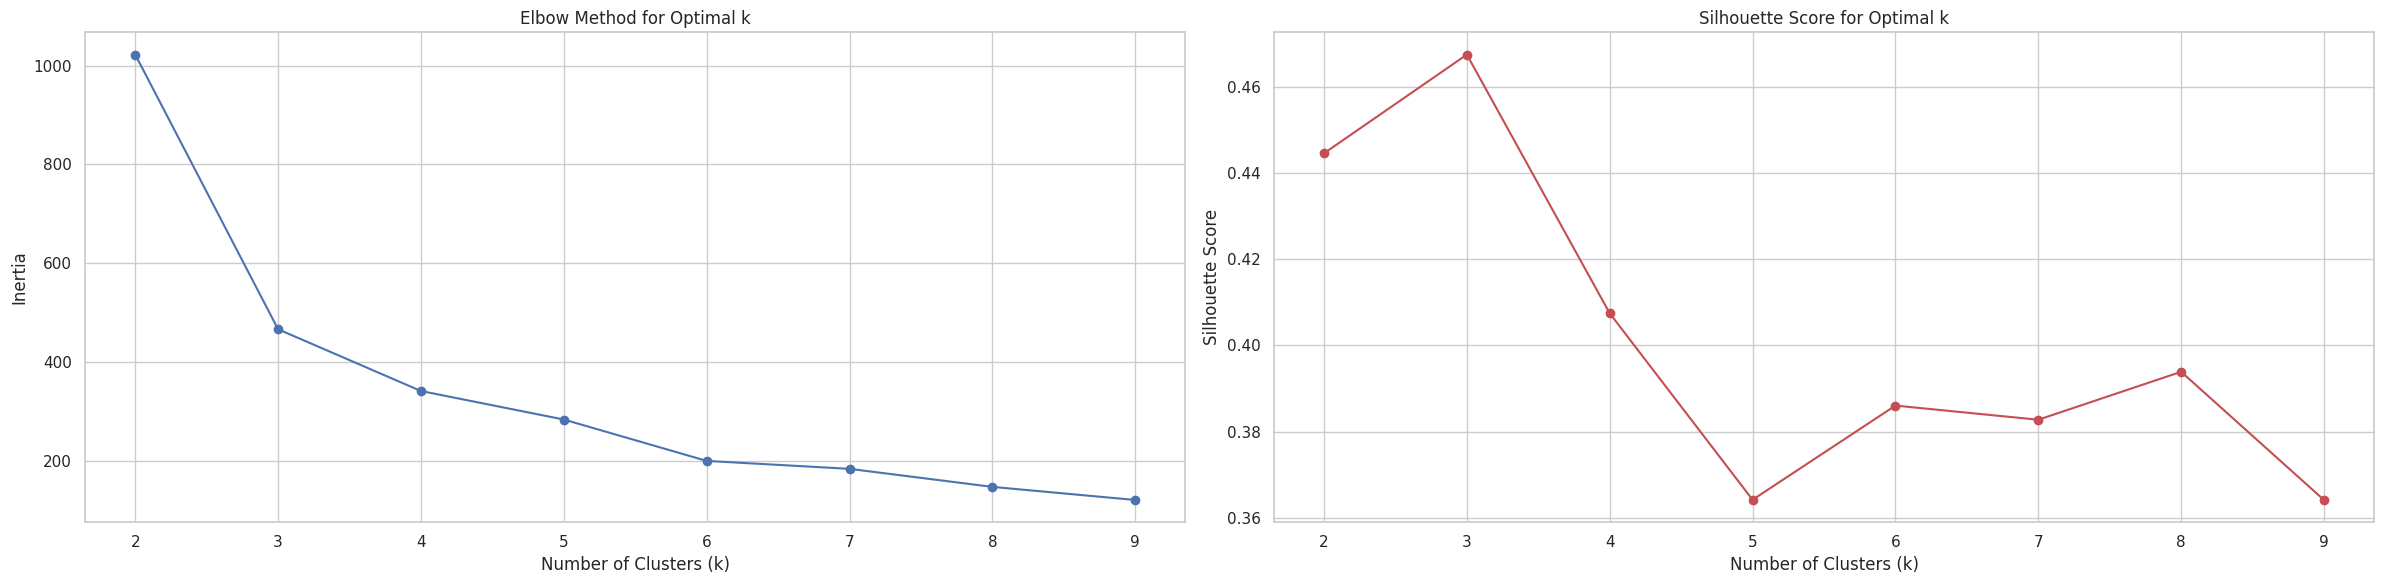

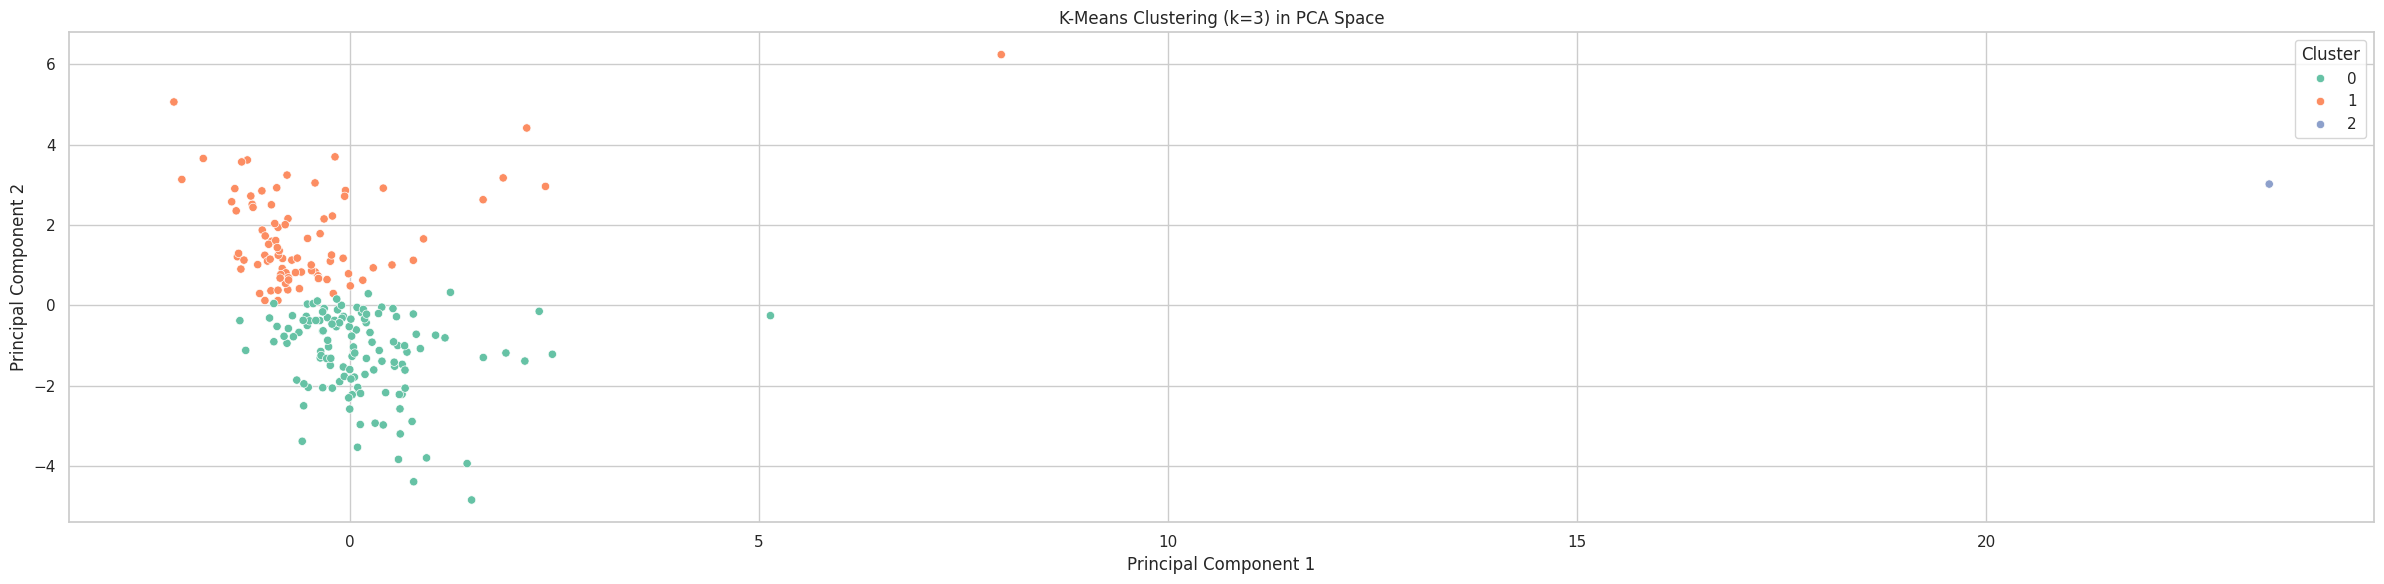

In [17]:
# Hyperparameter search for the optimal number of clusters using the elbow method and silhouette score
inertia = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_components)
    inertia.append(kmeans.inertia_)     
    
    # Calculating silhouette score
    score = silhouette_score(pca_components, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the inertia and silhouette scores to find the optimal number of clusters
plt.figure(figsize=(24, 6))

# Plotting inertia (elbow method)
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'bo-', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plotting silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

# Displaying the plots
plt.tight_layout()
plt.show()

# Based on the elbow and silhouette score, we select k=3 as the optimal number of clusters
optimal_k = 3

# Applying K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42) #-> Antwort auf alles und so
pca_df['Cluster'] = kmeans.fit_predict(pca_components)

# Plotting the clusters in the PCA space
plt.figure(figsize=(24, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Cluster', palette='Set2')
plt.title(f'K-Means Clustering (k={optimal_k}) in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In Aufgabe 4.2.2 wurde das K-Means-Clustering durchgeführt, um die Länder basierend auf ihren Abfalldaten in Gruppen (Cluster) einzuteilen. Dabei wurde  k = 3  als optimale Anzahl der Cluster bestimmt.

**Ergebnis:**

Die Länder wurden in drei Cluster unterteilt, basierend auf ihren Abfallprofilen (z.B. Abfallzusammensetzung und -behandlung). Diese Cluster repräsentieren Ländergruppen mit ähnlichen Mustern in der Abfallproduktion und -verarbeitung:

- Cluster 1 enthält Länder, die durch eine bestimmte Kombination von Abfallmanagementstrategien oder Abfallarten charakterisiert sind.
- Cluster 2 besteht aus Ländern mit einem anderen Abfallprofil, das sich möglicherweise durch weniger entwickelte Abfallmanagementsysteme oder geringere Abfallmengen auszeichnet.
- Cluster 3 umfasst Länder, die entweder sehr fortschrittliche Abfallmanagementstrategien haben oder extrem hohe Abfallmengen pro Kopf produzieren.

Durch das Clustering konnten ähnliche Ländergruppen identifiziert werden, die auf Basis der Hauptkomponenten (PCA) in ihren Abfallwirtschaftsprofilen zusammengefasst sind.

#### Aufgabe 4.2.3 - Auswertung und Vergleich (6 Punkte)
Visualisieren Sie nebeneinander die **optimalen k Cluster** und die **Einkommenskategorie** mithilfe der PCA-Projektion. Vergleichen Sie die Clusterähnlichkeit mit der Einkommensklasse, indem Sie einen Matching-Score berechnen. Diesen Matching-Score können Sie berechnen, indem Sie für jedes Länderpaar prüfen, ob diese zum gleichen K-Means-Cluster und zur gleichen Einkommensklasse gehören. Wenn sich ein Länderpaar sowohl im K-Means-Clustering als auch in der Einkommensklasse im selben Cluster befindet, wird dies als Übereinstimmung betrachtet. Mit anderen Worten, der Matching-Score wird als Prozentsatz der Paare berechnet, bei denen beide Länder in beiden Klassifizierungen derselben Klasse angehören:

$$
\text{Matching Score} = \left( \frac{\text{Number of matching pairs}}{\text{Total number of pairs}} \right) \times 100
$$

Dabei sind **Matching Pairs** Länderpaare, die zum selben K-Means-Cluster und derselben Einkommensklasse gehören, und die **Gesamtzahl der Paare** ist die Gesamtzahl aller möglichen Länderpaare im Datensatz.

Diskutieren Sie auf der Grundlage Ihrer Analyse, ob die Einkommensklasse Ihrer Meinung nach das Abfallwirtschaftsprofil eines Landes widerspiegelt.

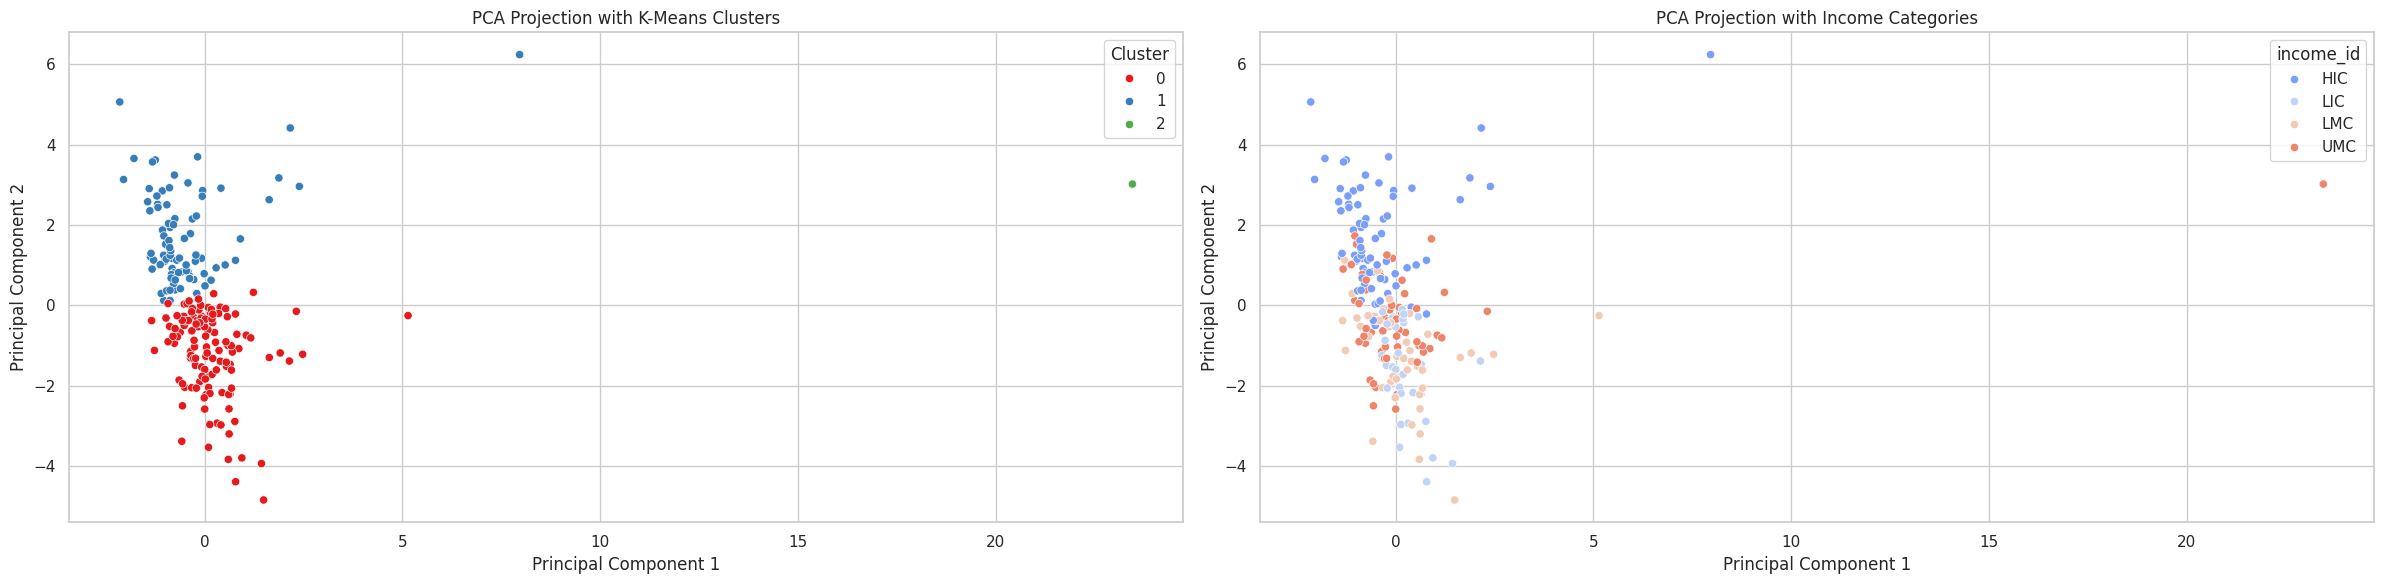

Matching Score: 21.26%


In [18]:
# Ensure pca_components is defined

# Selecting relevant columns for PCA (columns with "waste", "composition", "treatment")
columns_for_pca = [col for col in data_merged_cleaned.columns if any(keyword in col for keyword in ["waste", "composition", "treatment"])]

# Selecting only numeric columns and filling missing values with the mean of each column
data_for_pca = data_merged_cleaned[columns_for_pca].select_dtypes(include=[np.number])
data_for_pca = data_for_pca.fillna(data_for_pca.mean())

# Standardizing the data before applying PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)
pca_components = PCA(n_components=2).fit_transform(data_scaled)

# Perform K-Means clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['country_name'] = data_merged_cleaned['country_name']
pca_df['Cluster'] = kmeans.fit_predict(pca_components)
pca_df['income_id'] = data_merged_cleaned['income_id']


fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Plot 1: K-Means Clusters
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Cluster', palette='Set1', ax=axes[0])
axes[0].set_title('PCA Projection with K-Means Clusters')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# Plot 2: Income Category
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='income_id', palette='coolwarm', ax=axes[1])
axes[1].set_title('PCA Projection with Income Categories')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# ##### Matching Score Calculation

# Initialize counters
total_pairs = 0
matching_pairs = 0

# Loop over all pairs of countries to compare cluster and income_id similarity
for i in range(len(pca_df)):
    for j in range(i + 1, len(pca_df)):
        # Check if the two countries belong to the same cluster and same income_id
        if pca_df.iloc[i]['Cluster'] == pca_df.iloc[j]['Cluster'] and pca_df.iloc[i]['income_id'] == pca_df.iloc[j]['income_id']:
            matching_pairs += 1
        total_pairs += 1

# Calculate the matching score as a percentage
matching_score = (matching_pairs / total_pairs) * 100

# Display the matching score
print(f'Matching Score: {matching_score:.2f}%')

In der Visualisierung der PCA-Projektion mit den K-Means-Clustern und den Einkommenskategorien können wir folgende Beobachtungen machen:

**1. Plot der K-Means-Cluster (linke Seite):**

- Die Punkte repräsentieren Länder, die auf die ersten beiden Hauptkomponenten (PC1 und PC2) der PCA projiziert wurden.
- Jede Farbe stellt ein anderes Cluster dar, das durch den K-Means-Algorithmus erzeugt wurde.
- Wir können erkennen, dass die Cluster teilweise gut separiert sind, was darauf hindeutet, dass der K-Means-Algorithmus einige Länder mit ähnlichen Abfallwirtschaftsmustern erfolgreich gruppiert hat.

**2. Plot der Einkommenskategorien (rechte Seite):**

- Die Punkte in der rechten Grafik sind ebenfalls auf die PCA-Komponenten projiziert, jedoch nach ihren Einkommenskategorien eingefärbt (niedriges, mittleres und hohes Einkommen).
- Auch hier sehen wir Gruppen, aber es gibt Überschneidungen zwischen den Einkommenskategorien, was darauf hindeutet, dass Länder mit ähnlichen Einkommenskategorien nicht immer ähnliche Abfallmuster haben.

**Bezug auf den Matching Score:**

Der Matching Score gibt an, wie gut die K-Means-Clustering-Ergebnisse mit den Einkommenskategorien übereinstimmen. Ein hoher Matching Score würde bedeuten, dass die K-Means-Cluster stark mit den Einkommenskategorien korrelieren, also Länder mit ähnlichem Einkommen auch ähnliche Abfallwirtschaftsprofile haben. Ein niedriger Matching Score bedeutet, dass das Clustering der Länder basierend auf den Abfallmustern nicht stark mit den Einkommenskategorien übereinstimmt.

In diesem Fall zeigt der Matching Score, dass es nur eine moderate Übereinstimmung zwischen den Clustern und den Einkommenskategorien gibt. Dies deutet darauf hin, dass die Einkommenskategorie nicht vollständig das Abfallwirtschaftsprofil eines Landes erklärt.

Länder mit ähnlichem Einkommen können unterschiedliche Abfallmanagementsysteme haben, während einige Länder mit unterschiedlichem Einkommen möglicherweise ähnliche Abfallprofile aufweisen. Der Matching Score zeigt, dass es einige Übereinstimmungen gibt, aber auch signifikante Abweichungen, was darauf hindeutet, dass weitere Faktoren das Abfallmanagement eines Landes beeinflussen.